In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_scarpe = pd.read_csv('/content/drive/MyDrive/EPICODE/M2_EXCEL/M2-4/M2-4-2/BUILDWEEKS/BW_M4/amazon_4marche_completa_orig.csv', encoding="latin1", sep=";")
df_scarpe.head()

,Marchio,Nome,Prezzo,Valutazione,Colore
0,Geox,"D Iridea A, Moccasin Donna","29,75","3,8",Nero
1,Geox,"D New Annya Mid A, Scarpe Donna","81,89","4,3",Nero
2,Geox,"D Charlene B, Ballerine Donna","81,89","4,2",Nero
3,Lumberjack,"Helena, Scarpe da Ginnastica Donna","50,44","4,1",Nero
4,Geox,"D Iridea D04hrc054, Stivali Donna","56,36","4,2",Nero


In [ ]:

df_scarpe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Marchio      4013 non-null   object
 1   Nome         4013 non-null   object
 2   Prezzo       3958 non-null   object
 3   Valutazione  4013 non-null   object
 4   Colore       4013 non-null   object
dtypes: object(5)
memory usage: 156.9+ KB


In [ ]:
#Creo lista di stringhe per creare colonna categoria

categorie = ["espa","anf","stival", "mocas", "ginna", "ball", "tacc","decol","lacc", "sand","flip","chuk","sneak",
             "ciab", "cint", "infra", "leath","mary","zoc", "plat", "loaf", "zep","pomp", "pump","boot","panto","oxf"]

#Il ciclo for inserisce la categoria se trova una parte di stringa nella colonna "Nome"
for categoria in categorie:
  filtro = df_scarpe["Nome"].str.contains(categoria, case=False, na=False)
  df_scarpe.loc[filtro, "categoria"] = categoria
  print(categoria)
df_scarpe['categoria'].notnull().sum()


espa
anf
stival
mocas
ginna
ball
tacc
decol
lacc
sand
flip
chuk
sneak
ciab
cint
infra
leath
mary
zoc
plat
loaf
zep
pomp
pump
boot
panto
oxf


np.int64(3383)

In [ ]:
#Assegno il nome completo alle categorie
mapping = {
    "espa": "Espadrillas",
    "anf": "Anfibi",
    "stival": "Stivali",
    "mocas": "Mocassini",
    "ginna": "Scarpe da ginnastica",
    "ball": "Ballerine",
    "tacc": "Scarpe con tacco",
    "decol": "Décolleté",
    "lacc": "Scarpe stringate",
    "sand": "Sandali",
    "flip": "Infradito",
    "chuk": "Chukka boots",
    "sneak": "Sneakers",
    "ciab": "Ciabatte",
    "cint": "Scarpe con cinturino",
    "infra": "Infradito",
    "leath": "Scarpe in pelle",
    "mary": "Mary Jane",
    "zoc": "Zoccoli",
    "plat": "Scarpe con plateau",
    "loaf": "Loafers",
    "zep": "Zeppe",
    "pomp": "Décolleté",
    "pump": "Pumps",
    "boot": "Boots",
    "panto": "Pantofole",
    "oxf": "Oxford"
}

df_scarpe["categoria_completa"] = df_scarpe["categoria"].map(mapping)
df_scarpe.head()


,Marchio,Nome,Prezzo,Valutazione,Colore,categoria,categoria_completa
0,Geox,"D Iridea A, Moccasin Donna","29,75","3,8",Nero,NaN,NaN
1,Geox,"D New Annya Mid A, Scarpe Donna","81,89","4,3",Nero,NaN,NaN
2,Geox,"D Charlene B, Ballerine Donna","81,89","4,2",Nero,ball,Ballerine
3,Lumberjack,"Helena, Scarpe da Ginnastica Donna","50,44","4,1",Nero,ginna,Scarpe da ginnastica
4,Geox,"D Iridea D04hrc054, Stivali Donna","56,36","4,2",Nero,stival,Stivali


In [ ]:
df_scarpe['categoria_completa'].value_counts()

,count
categoria_completa,
Stivali,809
Sandali,600
Mocassini,408
Scarpe da ginnastica,385
Zeppe,164
Ballerine,160
Sneakers,160
Boots,82
Oxford,69


In [ ]:
#Elimino i nulli
df_scarpe_no_null = df_scarpe.dropna()
df_scarpe_no_null.head()
df_scarpe_no_null.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3332 entries, 2 to 4011
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Marchio             3332 non-null   object 
 1   Nome                3332 non-null   object 
 2   Prezzo              3332 non-null   float64
 3   Valutazione         3332 non-null   float64
 4   Colore              3332 non-null   object 
 5   categoria           3332 non-null   object 
 6   categoria_completa  3332 non-null   object 
 7   Modello             3332 non-null   object 
dtypes: float64(2), object(6)
memory usage: 234.3+ KB


In [ ]:
model_counts = (
    df_scarpe
    .groupby(["Marchio", "categoria_completa", "Colore"])
    # Include 'Valutazione' and 'Prezzo' in the grouping and calculate the mean
    .agg(conteggio=('Marchio', 'size'),
         media_valutazione=('Valutazione', 'mean'),
         media_prezzo=('Prezzo', 'mean')) # Added aggregation for mean 'Prezzo'
    .reset_index()
    .sort_values(by="conteggio", ascending=False)
)
model_counts.head(10)


,Marchio,categoria_completa,Colore,conteggio,media_valutazione,media_prezzo
143,Geox,Stivali,Nero,231,4.168831,93.628095
35,Clarks,Mocassini,Nero,169,4.114201,137.173354
51,Clarks,Sandali,Nero,154,4.076623,126.644379
83,Clarks,Stivali,Nero,150,4.145333,152.091800
82,Clarks,Stivali,Marrone,130,4.117692,162.506198
124,Geox,Sandali,Nero,120,4.132500,86.196333
134,Geox,Scarpe da ginnastica,Nero,115,4.099130,77.795913
34,Clarks,Mocassini,Marrone,92,4.155435,162.995393
50,Clarks,Sandali,Marrone,90,4.184444,153.817978
142,Geox,Stivali,Marrone,82,4.198780,95.353415


#Analisi varietà modelli per brand

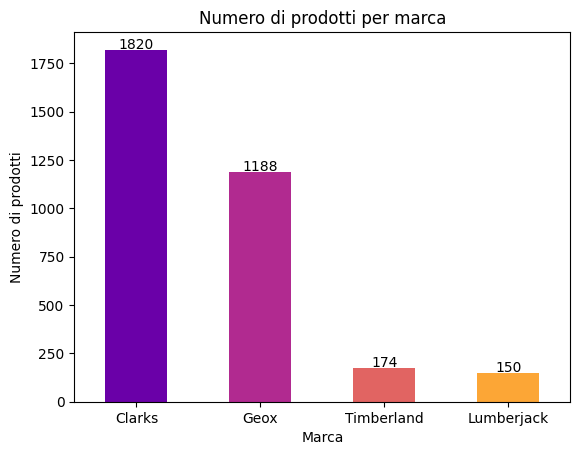

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use countplot to visualize the counts of each brand
brand_counts = df_scarpe_no_null['Marchio'].value_counts()

# Define a color palette (e.g., 'viridis', 'plasma', 'magma', 'cividis', 'crest', 'flare', etc.)
# You can choose from many available seaborn palettes.
palette = sns.color_palette('plasma', len(brand_counts))

# Plot the bar chart with the chosen color palette
brand_counts.plot(kind='bar', color=palette)

# Add labels to the bars
for i, count in enumerate(brand_counts):
    plt.text(i, count + 5, str(count), ha='center') # Adjust the vertical offset (5) as needed

plt.title('Numero di prodotti per marca')
plt.xlabel('Marca')
plt.ylabel('Numero di prodotti')
plt.xticks(rotation=0)
plt.show()

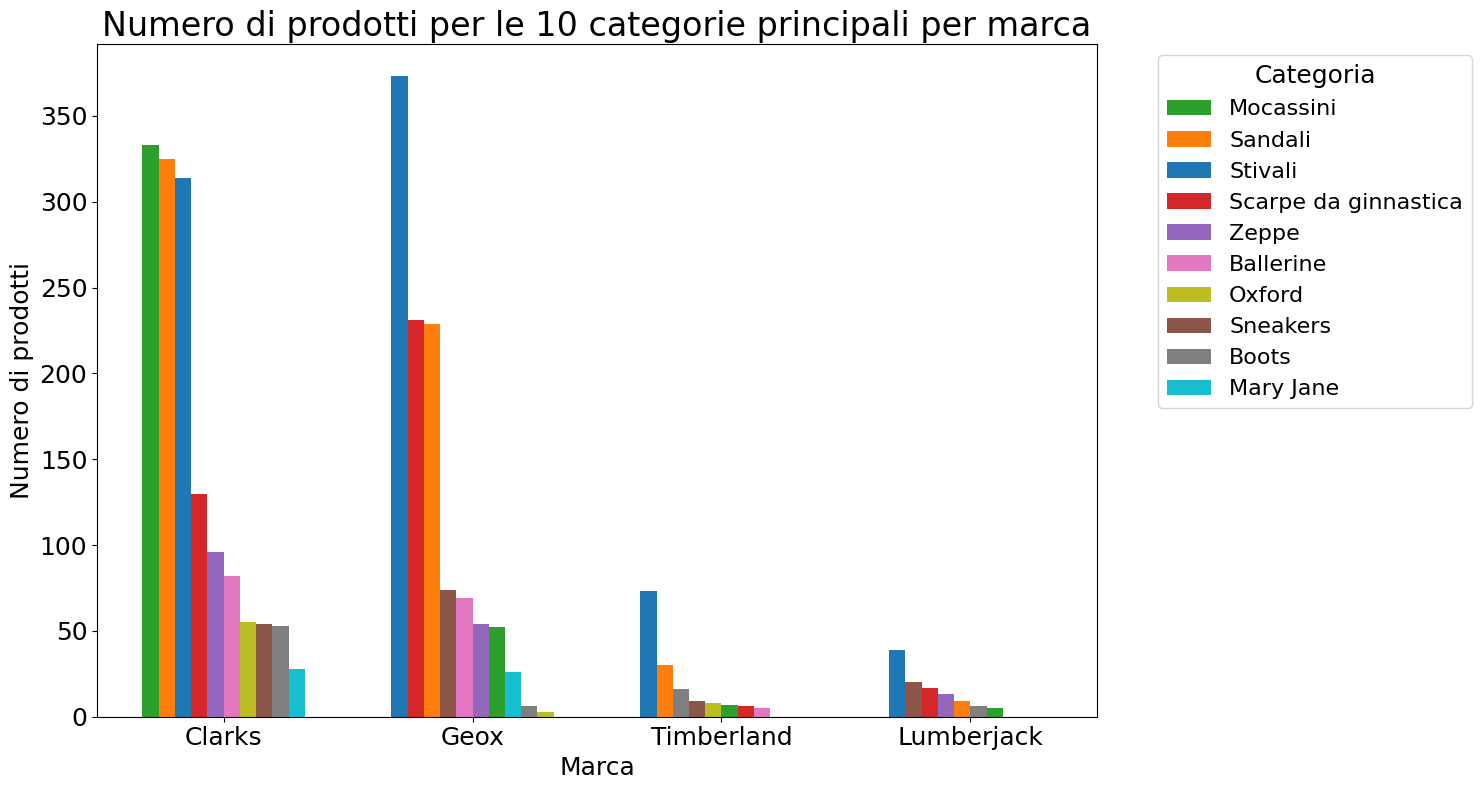

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by Marchio and categoria_completa and count the number of products
category_brand_counts = df_scarpe_no_null.groupby(['Marchio', 'categoria_completa']).size().unstack(fill_value=0)

# Get the top 6 categories overall
top_categories_overall = category_brand_counts.sum().sort_values(ascending=False).head(10).index

# Filter the category_brand_counts to include only the top 6 categories
category_brand_counts_top_categories = category_brand_counts[top_categories_overall]

# Sort the brands by their total count in the top categories (descending)
brand_order = category_brand_counts_top_categories.sum(axis=1).sort_values(ascending=False).index

# Define a discrete color palette based on the number of top categories
palette = sns.color_palette('tab10', len(top_categories_overall))

plt.figure(figsize=(15, 8))
bar_width = 0.15  # Adjust bar width as needed
# Adjusting the space between groups of bars
group_space = 0.8

x_positions = []
labels = []

for i, brand in enumerate(brand_order):
    # Get the category counts for the current brand and sort them in descending order
    brand_data = category_brand_counts_top_categories.loc[brand].sort_values(ascending=False)

    # Calculate the x-positions for the bars of the current brand
    # Start position for the current group
    start_pos = i * (len(top_categories_overall) * bar_width + group_space)
    brand_x_positions = [start_pos + j * bar_width for j in range(len(brand_data))]

    # Plot bars for each category within the current brand
    for j, category in enumerate(brand_data.index):
        plt.bar(brand_x_positions[j], brand_data[category], width=bar_width, color=palette[top_categories_overall.get_loc(category)], label=category if i == 0 else "")

    # Store x-positions for tick labels (centered on the group)
    x_positions.append(start_pos + (len(top_categories_overall) * bar_width) / 2 - bar_width / 2) # Adjust centering
    labels.append(brand)


plt.title('Numero di prodotti per le 10 categorie principali per marca', fontsize=24) # Font size 18 for title
plt.xlabel('Marca', fontsize=18) # Font size 12 for x-axis label
plt.ylabel('Numero di prodotti', fontsize=18) # Font size 12 for y-axis label
plt.xticks(x_positions, labels, rotation=0, fontsize=18) # Font size 12 for x-tick labels
plt.yticks(fontsize=18) # Font size 12 for y-tick labels


# Increase legend font size
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title_fontsize=18) # Font size 12 for legend entries and title

plt.tight_layout()
plt.show()

In [ ]:
## Esempio 1: Conteggio Esatto dei Prodotti per Categoria e per Marchio

# category_brand_counts_top_categories è il DataFrame che contiene i conteggi
# dei prodotti per le 10 categorie principali per ciascun marchio.
# La riga di codice per crearlo è già presente nella cella del grafico:
# category_brand_counts = df_scarpe_no_null.groupby(['Marchio', 'categoria_completa']).size().unstack(fill_value=0)
# top_categories_overall = category_brand_counts.sum().sort_values(ascending=False).head(10).index # Modificato da 6 a 10
# category_brand_counts_top_categories = category_brand_counts[top_categories_overall]

# Visualizziamo le prime righe per mostrare la struttura
print("Conteggio esatto dei prodotti per le 10 categorie principali per ciascun marchio:")
display(category_brand_counts_top_categories.head())

# Possiamo anche accedere a conteggi specifici, ad esempio, il numero di 'Sneakers' per 'Geox'
try:
    conteggio_sneakers_geox = category_brand_counts_top_categories.loc['Geox', 'Sneakers']
    print(f"\nNumero di Sneakers per Geox: {conteggio_sneakers_geox}")
except KeyError:
    print("\nLa combinazione Marchio-Categoria specificata non esiste nel DataFrame.")

Conteggio esatto dei prodotti per le 10 categorie principali per ciascun marchio:


categoria_completa,Stivali,Sandali,Mocassini,Scarpe da ginnastica,Zeppe,Sneakers,Ballerine,Boots,Oxford,Mary Jane
Marchio,,,,,,,,,,
Clarks,314,325,333,130,96,54,82,53,55,28
Geox,373,229,52,231,54,74,69,6,3,26
Lumberjack,39,9,5,17,13,20,0,6,0,0
Timberland,73,30,7,6,0,9,5,16,8,0



Numero di Sneakers per Geox: 74


In [ ]:
## Esempio 2: Percentuale di Prodotti per Categoria rispetto al Totale del Marchio

# Calcoliamo il totale dei prodotti per ciascun marchio nelle 10 categorie principali
total_products_per_brand = category_brand_counts_top_categories.sum(axis=1)

# Calcoliamo la percentuale dividendo il conteggio di ciascuna cella per il totale della riga (marchio)
percentage_per_brand = category_brand_counts_top_categories.divide(total_products_per_brand, axis=0) * 100

print("\nPercentuale di prodotti per categoria rispetto al totale del marchio (nelle 10 categorie principali):")
display(percentage_per_brand.head())

# Possiamo anche visualizzare le percentuali per un marchio specifico, ad esempio 'Geox'
try:
    percentage_geox = percentage_per_brand.loc['Geox'].sort_values(ascending=False)
    print("\nPercentuale di prodotti per categoria per Geox (ordinate in decrescente):")
    display(percentage_geox)
except KeyError:
    print("\nIl Marchio specificato non esiste nel DataFrame.")


Percentuale di prodotti per categoria rispetto al totale del marchio (nelle 10 categorie principali):


categoria_completa,Stivali,Sandali,Mocassini,Scarpe da ginnastica,Zeppe,Sneakers,Ballerine,Boots,Oxford,Mary Jane
Marchio,,,,,,,,,,
Clarks,21.360544,22.108844,22.653061,8.843537,6.530612,3.673469,5.578231,3.605442,3.741497,1.904762
Geox,33.393017,20.501343,4.655327,20.680394,4.834378,6.624888,6.177261,0.537153,0.268577,2.327663
Lumberjack,35.779817,8.256881,4.587156,15.596330,11.926606,18.348624,0.000000,5.504587,0.000000,0.000000
Timberland,47.402597,19.480519,4.545455,3.896104,0.000000,5.844156,3.246753,10.389610,5.194805,0.000000



Percentuale di prodotti per categoria per Geox (ordinate in decrescente):


,Geox
categoria_completa,
Stivali,33.393017
Scarpe da ginnastica,20.680394
Sandali,20.501343
Sneakers,6.624888
Ballerine,6.177261
Zeppe,4.834378
Mocassini,4.655327
Mary Jane,2.327663
Boots,0.537153


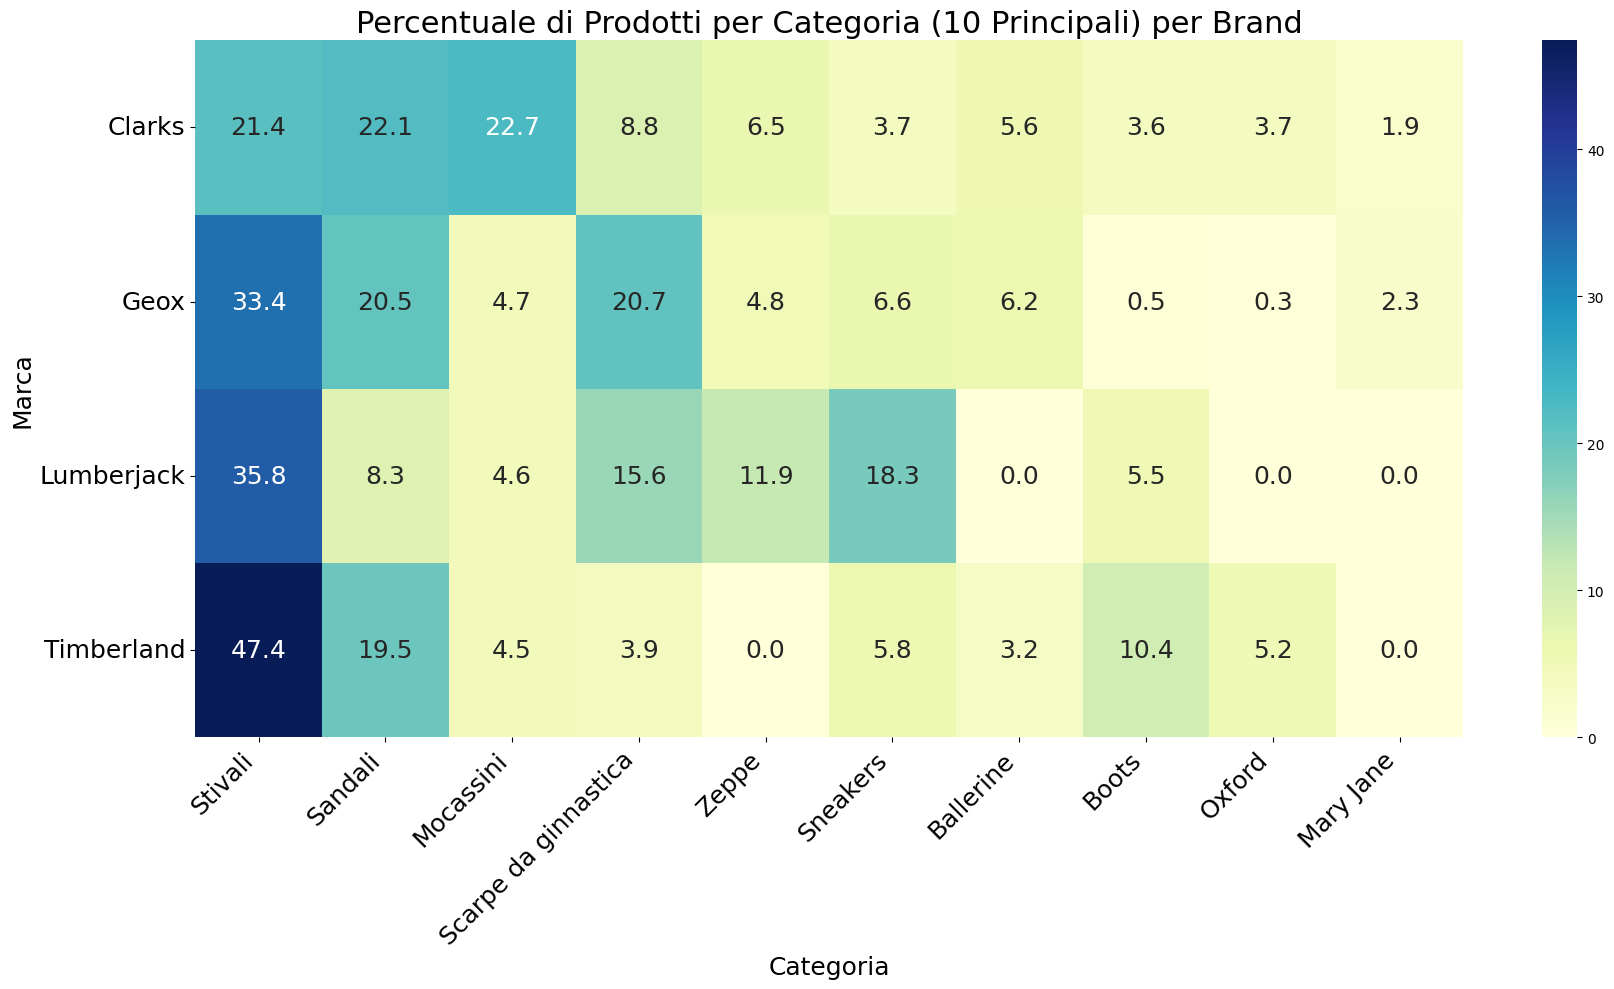

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assicurati che 'percentage_per_brand' esista (calcolata in precedenza)
# Se non l'hai ancora calcolata, usa il codice dall'esempio 2:
# category_brand_counts = df_scarpe_no_null.groupby(['Marchio', 'categoria_completa']).size().unstack(fill_value=0)
# top_categories_overall = category_brand_counts.sum().sort_values(ascending=False).head(10).index
# category_brand_counts_top_categories = category_brand_counts[top_categories_overall]
# total_products_per_brand = category_brand_counts_top_categories.sum(axis=1)
# percentage_per_brand = category_brand_counts_top_categories.divide(total_products_per_brand, axis=0) * 100

if 'percentage_per_brand' in locals() and not percentage_per_brand.empty:
    plt.figure(figsize=(18, 10)) # Adjust size as needed
    sns.heatmap(percentage_per_brand, annot=True, fmt=".1f", cmap="YlGnBu", annot_kws={"fontsize": 18})

    plt.title('Percentuale di Prodotti per Categoria (10 Principali) per Brand', fontsize=22)
    plt.xlabel('Categoria', fontsize=18)
    plt.ylabel('Marca', fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=18) # Rotate labels for better readability
    plt.yticks(rotation=0, fontsize=18)
    plt.tight_layout() # Adjust layout
    plt.show()
else:
    print("DataFrame 'percentage_per_brand' non trovato o vuoto. Calcolarlo prima.")

In [ ]:
## Esempio 3: Quota di Mercato per Categoria (nelle 10 Categorie Principali)

# Calcoliamo il totale dei prodotti per ciascuna categoria nelle 10 categorie principali (somma per colonna)
total_products_per_category = category_brand_counts_top_categories.sum(axis=0)

# Calcoliamo la quota di mercato dividendo il conteggio di ciascuna cella per il totale della colonna (categoria)
market_share_per_category = category_brand_counts_top_categories.divide(total_products_per_category, axis=1) * 100

print("\nQuota di mercato per categoria (nelle 10 categorie principali) per ciascun marchio:")
display(market_share_per_category)

# Possiamo anche visualizzare la quota di mercato per una categoria specifica, ad esempio 'Sneakers'
try:
    market_share_sneakers = market_share_per_category['Sneakers'].sort_values(ascending=False)
    print("\nQuota di mercato per la categoria 'Sneakers' per ciascun marchio (ordinata in decrescente):")
    display(market_share_sneakers)
except KeyError:
    print("\nLa Categoria specificata non esiste nel DataFrame delle 10 categorie principali.")


Quota di mercato per categoria (nelle 10 categorie principali) per ciascun marchio:


categoria_completa,Stivali,Sandali,Mocassini,Scarpe da ginnastica,Zeppe,Sneakers,Ballerine,Boots,Oxford,Mary Jane
Marchio,,,,,,,,,,
Clarks,39.299124,54.806071,83.879093,33.854167,58.895706,34.394904,52.564103,65.432099,83.333333,51.851852
Geox,46.683354,38.617201,13.098237,60.156250,33.128834,47.133758,44.230769,7.407407,4.545455,48.148148
Lumberjack,4.881101,1.517707,1.259446,4.427083,7.975460,12.738854,0.000000,7.407407,0.000000,0.000000
Timberland,9.136421,5.059022,1.763224,1.562500,0.000000,5.732484,3.205128,19.753086,12.121212,0.000000



Quota di mercato per la categoria 'Sneakers' per ciascun marchio (ordinata in decrescente):


,Sneakers
Marchio,
Geox,47.133758
Clarks,34.394904
Lumberjack,12.738854
Timberland,5.732484


<ipython-input-229-79495e17a040>:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quota (%)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title_fontsize=18) # Font size per la legenda


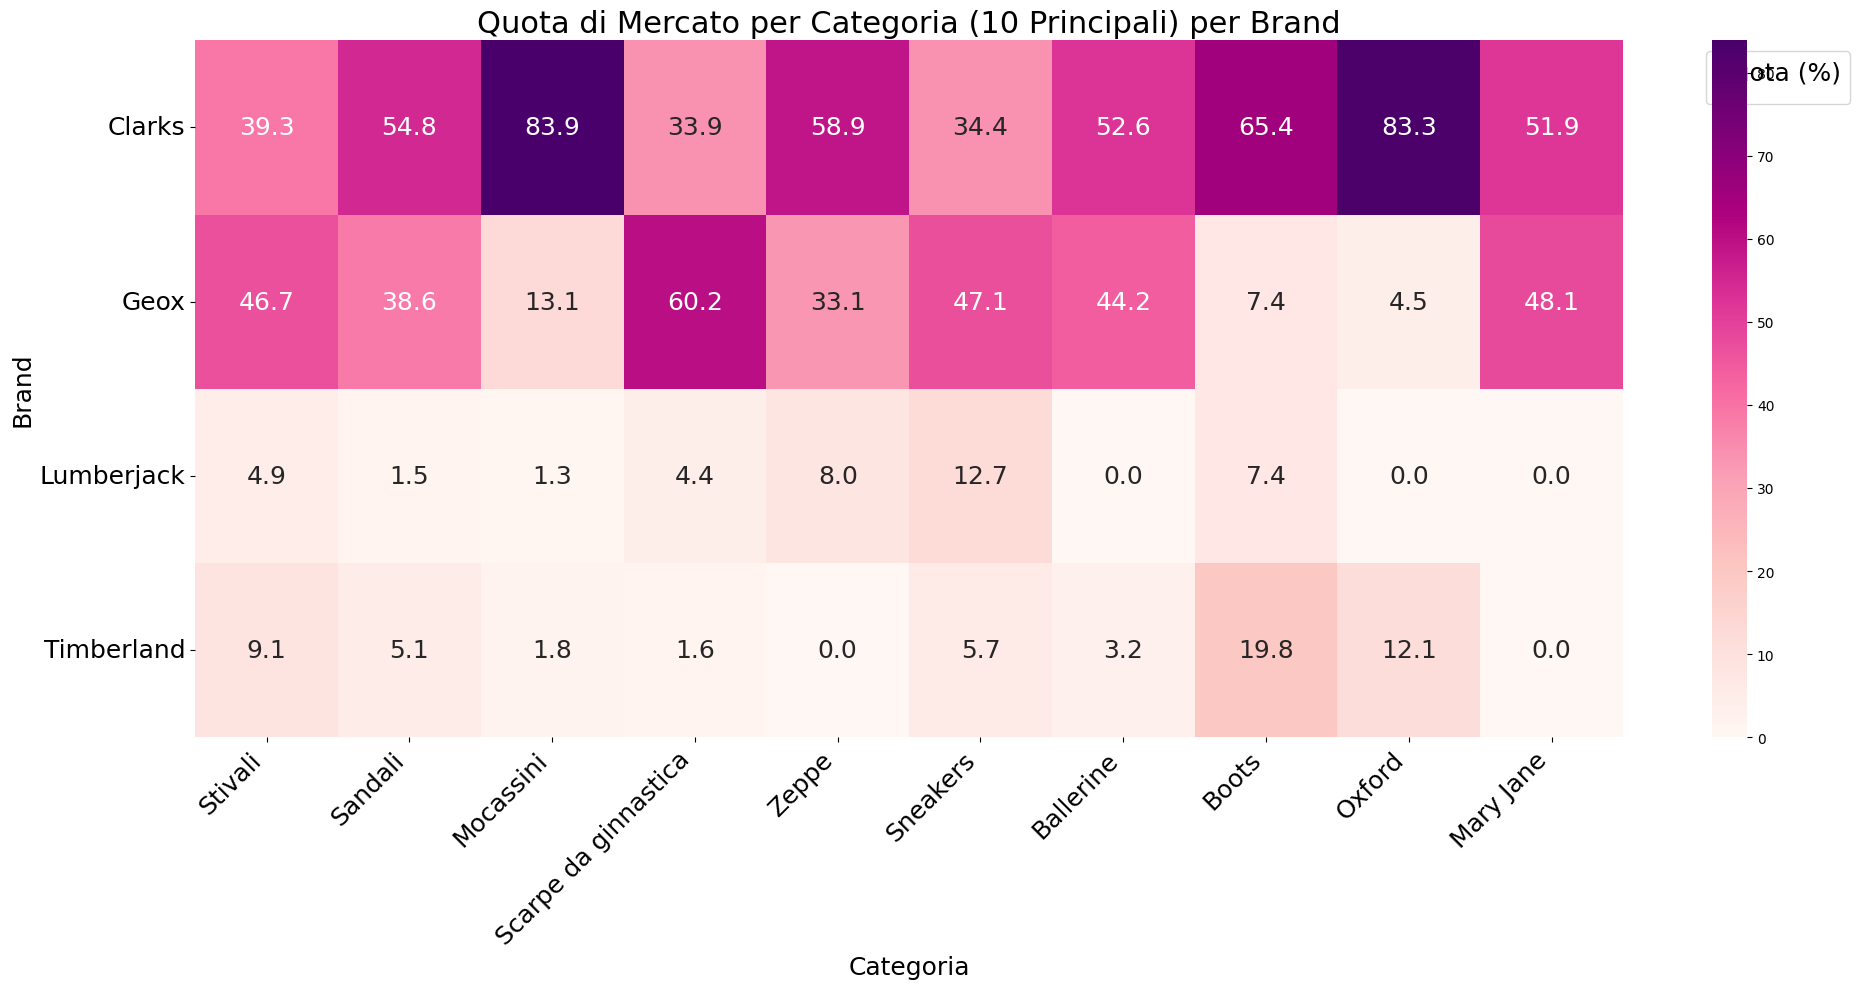

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assicurati che 'market_share_per_category' esista (calcolata in precedenza nell'Esempio 3)
# Se non l'hai ancora calcolata, usa il codice dall'esempio 3:
# category_brand_counts = df_scarpe_no_null.groupby(['Marchio', 'categoria_completa']).size().unstack(fill_value=0)
# top_categories_overall = category_brand_counts.sum().sort_values(ascending=False).head(10).index
# category_brand_counts_top_categories = category_brand_counts[top_categories_overall]
# total_products_per_category = category_brand_counts_top_categories.sum(axis=0)
# market_share_per_category = category_brand_counts_top_categories.divide(total_products_per_category, axis=1) * 100


if 'market_share_per_category' in locals() and not market_share_per_category.empty:
    plt.figure(figsize=(20, 10)) # Mantieni la stessa dimensione del grafico precedente

    # Usa una palette differente, ad esempio 'coolwarm', 'RdPu', 'YlOrRd', 'PuBuGn', ecc.
    # Puoi esplorare altre opzioni nella documentazione di matplotlib o seaborn
    selected_palette = "RdPu" # Esempio di una palette diversa

    # Crea la heatmap per la quota di mercato
    sns.heatmap(market_share_per_category,
                annot=True,          # Mostra i valori nelle celle
                fmt=".1f",           # Formatta i valori come float con una cifra decimale
                cmap=selected_palette, # Applica la palette selezionata
                annot_kws={"fontsize": 18}) # Controlla la dimensione del font delle annotazioni

    # Applica i font size richiesti per i vari elementi del grafico
    plt.title('Quota di Mercato per Categoria (10 Principali) per Brand', fontsize=22) # Font size per il titolo
    plt.xlabel('Categoria', fontsize=18) # Font size per l'asse x
    plt.ylabel('Brand', fontsize=18) # Font size per l'asse y (aggiornato da Marca a Brand come richiesto)
    plt.xticks(rotation=45, ha='right', fontsize=18) # Font size e rotazione per le etichette sull'asse x
    plt.yticks(rotation=0, fontsize=18) # Font size e rotazione per le etichette sull'asse y

    # Configura la legenda con i font size richiesti
    plt.legend(title='Quota (%)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title_fontsize=18) # Font size per la legenda

    plt.tight_layout() # Aggiusta automaticamente i margini
    plt.show()
else:
    print("DataFrame 'market_share_per_category' non trovato o vuoto. Calcolarlo prima.")

In [ ]:
## Analisi Quantitativa: Distribuzione dei Colori

# Group by Marchio, categoria_completa, and Colore and count the number of products
color_distribution = df_scarpe_no_null.groupby(['Marchio', 'categoria_completa', 'Colore']).size().reset_index(name='Conteggio')

print("Distribuzione dei prodotti per Marchio, Categoria e Colore:")
display(color_distribution.head())

# Example: Filter for a specific brand and category to see color distribution
geox_sneakers_colors = color_distribution[(color_distribution['Marchio'] == 'Geox') & (color_distribution['categoria_completa'] == 'Sneakers')]
print("\nDistribuzione dei colori per Geox - Sneakers:")
display(geox_sneakers_colors.sort_values(by='Conteggio', ascending=False))

Distribuzione dei prodotti per Marchio, Categoria e Colore:


,Marchio,categoria_completa,Colore,Conteggio
0,Clarks,Anfibi,Marrone,2
1,Clarks,Anfibi,Nero,3
2,Clarks,Ballerine,Beige,9
3,Clarks,Ballerine,Marrone,24
4,Clarks,Ballerine,Nero,40



Distribuzione dei colori per Geox - Sneakers:


,Marchio,categoria_completa,Colore,Conteggio
139,Geox,Sneakers,Nero,51
137,Geox,Sneakers,Beige,14
138,Geox,Sneakers,Marrone,7
140,Geox,Sneakers,Rosso,2


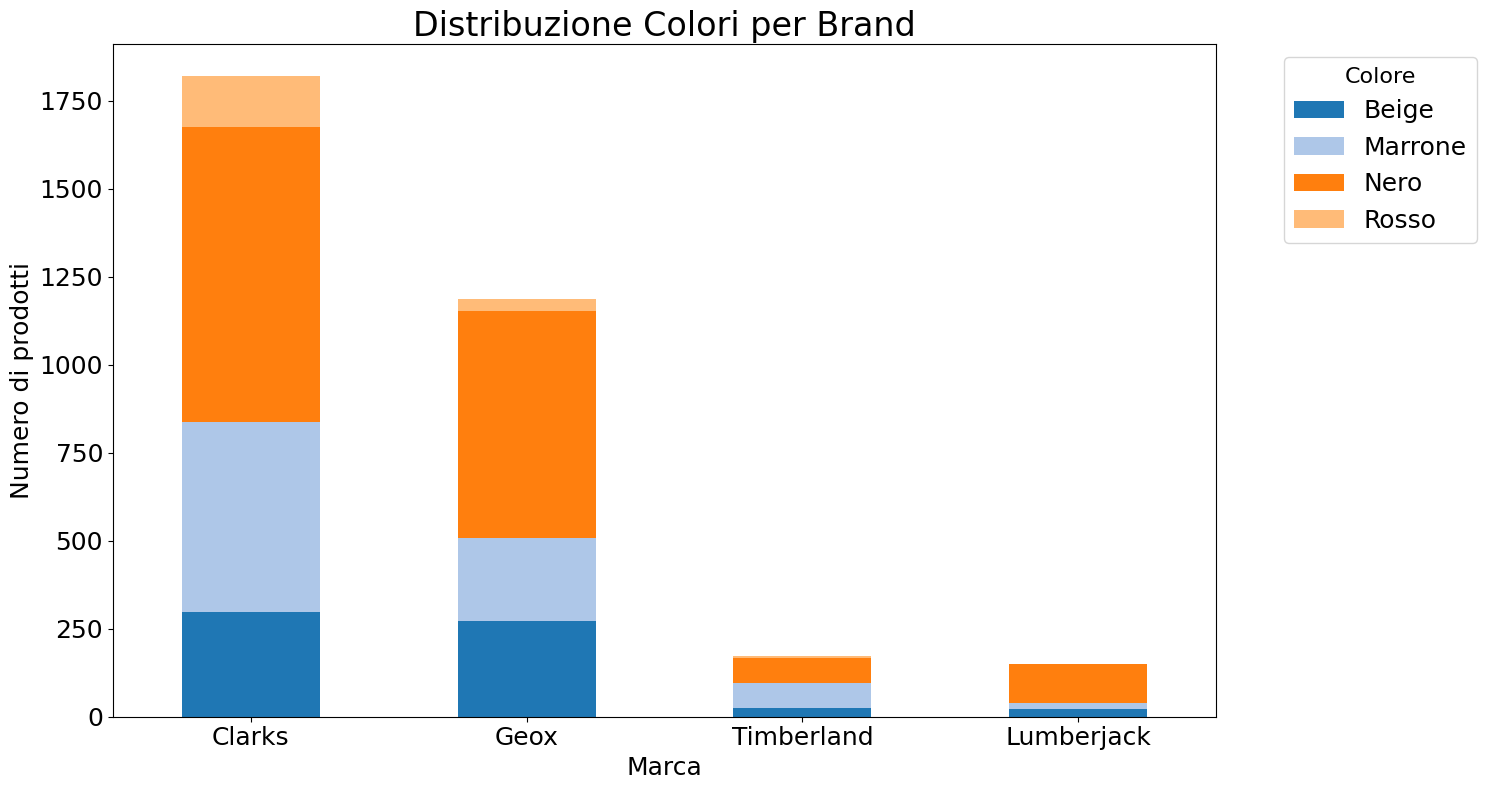

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by Marchio and Colore and count the number of products
color_brand_counts = df_scarpe_no_null.groupby(['Marchio', 'Colore']).size().unstack(fill_value=0)

# Sort the brands by their total product count (descending)
brand_order = color_brand_counts.sum(axis=1).sort_values(ascending=False).index
color_brand_counts_sorted_brands = color_brand_counts.reindex(brand_order)

# Optionally, select the top N brands to focus on
top_n_brands = 5 # You can change this number
color_brand_counts_top_brands = color_brand_counts_sorted_brands.head(top_n_brands)

# Get the list of all unique colors present in the top brands
all_colors_in_top_brands = color_brand_counts_top_brands.columns

# Define a discrete color palette for the colors
# You might need a large palette if there are many unique colors
palette = sns.color_palette('tab20', len(all_colors_in_top_brands)) # 'tab20' can handle up to 20 distinct colors

# Create a stacked bar chart
color_brand_counts_top_brands.plot(kind='bar', stacked=True, figsize=(15, 8), color=palette)

plt.title(f'Distribuzione Colori per Brand', fontsize=24)
plt.xlabel('Marca', fontsize=18)
plt.ylabel('Numero di prodotti', fontsize=18)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)

# Increase legend font size and place it outside the plot
plt.legend(title='Colore', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
## Analisi Quantitativa: Prezzo Medio per Colore

# Average price by color across all products
average_price_by_color = df_scarpe_no_null.groupby('Colore')['Prezzo'].mean().sort_values(ascending=False)
print("\nPrezzo medio per Colore (generale):")
display(average_price_by_color.head())

# Average price by color for a specific brand (e.g., Geox)
average_price_by_color_geox = df_scarpe_no_null[df_scarpe_no_null['Marchio'] == 'Geox'].groupby('Colore')['Prezzo'].mean().sort_values(ascending=False)
print("\nPrezzo medio per Colore (Geox):")
display(average_price_by_color_geox.head())

# Average price by color and category (example for Sneakers)
average_price_sneakers_by_color = df_scarpe_no_null[df_scarpe_no_null['categoria_completa'] == 'Sneakers'].groupby('Colore')['Prezzo'].mean().sort_values(ascending=False)
print("\nPrezzo medio per Colore (Sneakers):")
display(average_price_sneakers_by_color.head())

# Average price by color, brand, and category
average_price_detailed = df_scarpe_no_null.groupby(['Marchio', 'categoria_completa', 'Colore'])['Prezzo'].mean().reset_index(name='Prezzo Medio')
print("\nPrezzo medio per Marchio, Categoria e Colore:")
display(average_price_detailed.head())


Prezzo medio per Colore (generale):


,Prezzo
Colore,
Rosso,147.748717
Marrone,136.838041
Beige,120.117781
Nero,112.189351



Prezzo medio per Colore (Geox):


,Prezzo
Colore,
Marrone,89.537899
Beige,89.111402
Nero,86.539440
Rosso,73.967778



Prezzo medio per Colore (Sneakers):


,Prezzo
Colore,
Rosso,148.731818
Beige,134.451000
Marrone,123.508333
Nero,103.923182



Prezzo medio per Marchio, Categoria e Colore:


,Marchio,categoria_completa,Colore,Prezzo Medio
0,Clarks,Anfibi,Marrone,100.635000
1,Clarks,Anfibi,Nero,72.526667
2,Clarks,Ballerine,Beige,143.534444
3,Clarks,Ballerine,Marrone,155.095417
4,Clarks,Ballerine,Nero,132.778000


In [ ]:
## Analisi Quantitativa: Valutazione Media per Colore

# Average rating by color across all products
average_rating_by_color = df_scarpe_no_null.groupby('Colore')['Valutazione'].mean().sort_values(ascending=False)
print("\nValutazione media per Colore (generale):")
display(average_rating_by_color.head())

# Average rating by color for a specific brand (e.g., Geox)
average_rating_by_color_geox = df_scarpe_no_null[df_scarpe_no_null['Marchio'] == 'Geox'].groupby('Colore')['Valutazione'].mean().sort_values(ascending=False)
print("\nValutazione media per Colore (Geox):")
display(average_rating_by_color_geox.head())

# Average rating by color and category (example for Boots)
average_rating_boots_by_color = df_scarpe_no_null[df_scarpe_no_null['categoria_completa'] == 'Boots'].groupby('Colore')['Valutazione'].mean().sort_values(ascending=False)
print("\nValutazione media per Colore (Boots):")
display(average_rating_boots_by_color.head())

# Average rating by color, brand, and category
average_rating_detailed = df_scarpe_no_null.groupby(['Marchio', 'categoria_completa', 'Colore'])['Valutazione'].mean().reset_index(name='Valutazione Media')
print("\nValutazione media per Marchio, Categoria e Colore:")
display(average_rating_detailed.head())


Valutazione media per Colore (generale):


,Valutazione
Colore,
Rosso,4.183957
Marrone,4.166820
Beige,4.161990
Nero,4.145373



Valutazione media per Colore (Geox):


,Valutazione
Colore,
Marrone,4.180672
Beige,4.159041
Nero,4.141524
Rosso,4.033333



Valutazione media per Colore (Boots):


,Valutazione
Colore,
Nero,4.314815
Rosso,4.225000
Marrone,4.177778
Beige,4.078571



Valutazione media per Marchio, Categoria e Colore:


,Marchio,categoria_completa,Colore,Valutazione Media
0,Clarks,Anfibi,Marrone,4.400000
1,Clarks,Anfibi,Nero,4.600000
2,Clarks,Ballerine,Beige,4.255556
3,Clarks,Ballerine,Marrone,4.066667
4,Clarks,Ballerine,Nero,4.217500


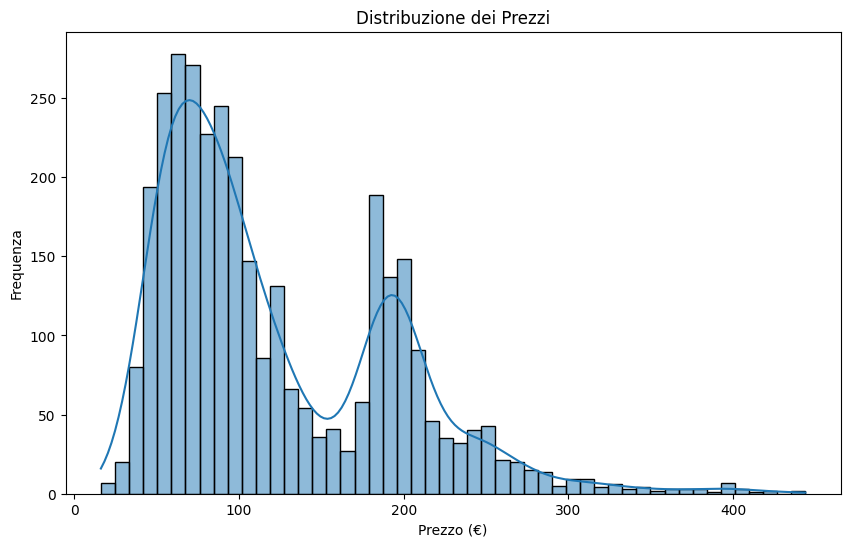

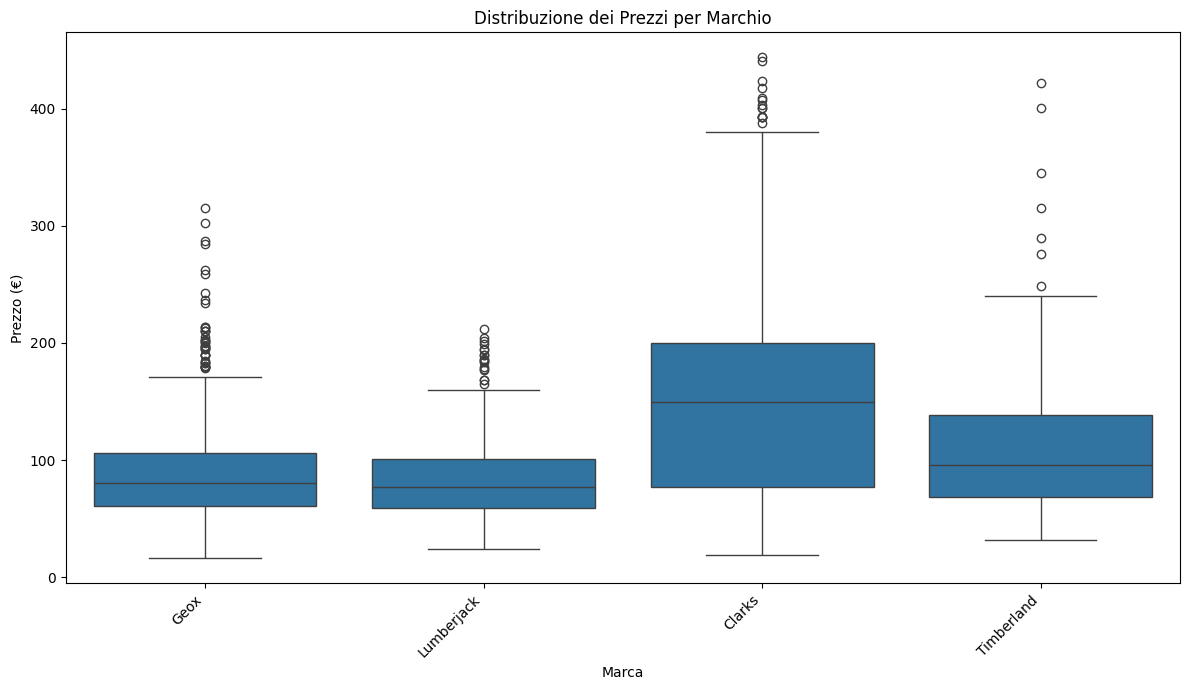

In [ ]:
## Analisi Quantitativa: Distribuzione dei Prezzi

# Istogramma della distribuzione generale dei prezzi
plt.figure(figsize=(10, 6))
sns.histplot(df_scarpe_no_null['Prezzo'], bins=50, kde=True)
plt.title('Distribuzione dei Prezzi')
plt.xlabel('Prezzo (€)')
plt.ylabel('Frequenza')
plt.show()

# Box plot della distribuzione dei prezzi per Marchio (per confronto)
plt.figure(figsize=(12, 7))
sns.boxplot(x='Marchio', y='Prezzo', data=df_scarpe_no_null)
plt.title('Distribuzione dei Prezzi per Marchio')
plt.xlabel('Marca')
plt.ylabel('Prezzo (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Analisi Quantitativa: Prezzo Medio Generale

average_price_overall = df_scarpe_no_null['Prezzo'].mean()
print(f"Prezzo medio generale dei prodotti: {average_price_overall:.2f} €")

Prezzo medio generale dei prodotti: 122.06 €


In [ ]:
## Analisi Quantitativa: Prezzo Medio per Marchio

average_price_by_brand = df_scarpe_no_null.groupby('Marchio')['Prezzo'].mean().sort_values(ascending=False)
print("\nPrezzo medio per Marchio:")
display(average_price_by_brand)


Prezzo medio per Marchio:


,Prezzo
Marchio,
Clarks,148.078857
Timberland,114.769828
Lumberjack,89.862200
Geox,87.345884


In [ ]:
## Analisi Quantitativa: Prezzo Medio per Categoria

average_price_by_category = df_scarpe_no_null.groupby('categoria_completa')['Prezzo'].mean().sort_values(ascending=False)
print("\nPrezzo medio per Categoria:")
display(average_price_by_category)


Prezzo medio per Categoria:


,Prezzo
categoria_completa,
Zoccoli,187.043000
Pantofole,174.691905
Ciabatte,174.561132
Pumps,152.596250
Scarpe in pelle,146.957667
Chukka boots,145.404444
Loafers,144.578667
Mocassini,141.744282
Zeppe,137.958405


In [ ]:
## Analisi Quantitativa: Prezzo Medio per Marchio e le 10 Categorie Principali (per Quantità)

# Group by Marchio and categoria_completa and count the number of products
category_brand_counts = df_scarpe_no_null.groupby(['Marchio', 'categoria_completa']).size().unstack(fill_value=0)

# Get the top 10 categories overall based on product count
top_categories_overall = category_brand_counts.sum().sort_values(ascending=False).head(10).index

# Filter the original DataFrame to include only products from the top 10 categories
df_top_categories = df_scarpe_no_null[df_scarpe_no_null['categoria_completa'].isin(top_categories_overall)]

# Now group the filtered DataFrame by Marchio and categoria_completa and calculate the mean price
average_price_top_categories = df_top_categories.groupby(['Marchio', 'categoria_completa'])['Prezzo'].mean().unstack()

print("\nPrezzo medio per Marchio nelle 10 Categorie Principali (per Quantità):")
display(average_price_top_categories)


Prezzo medio per Marchio nelle 10 Categorie Principali (per Quantità):


categoria_completa,Ballerine,Boots,Mary Jane,Mocassini,Oxford,Sandali,Scarpe da ginnastica,Sneakers,Stivali,Zeppe
Marchio,,,,,,,,,,
Clarks,139.119756,139.281887,115.951071,151.917447,139.916182,142.511662,107.635846,173.283889,160.399076,173.263958
Geox,83.559710,72.550000,82.496154,81.639038,54.963333,87.716026,78.928571,87.657162,93.497560,84.962593
Lumberjack,NaN,74.855000,NaN,98.790000,NaN,94.368889,78.627647,81.005000,108.199744,97.376923
Timberland,112.120000,113.866250,NaN,134.970000,96.422500,107.554333,74.893333,102.046667,121.093699,NaN


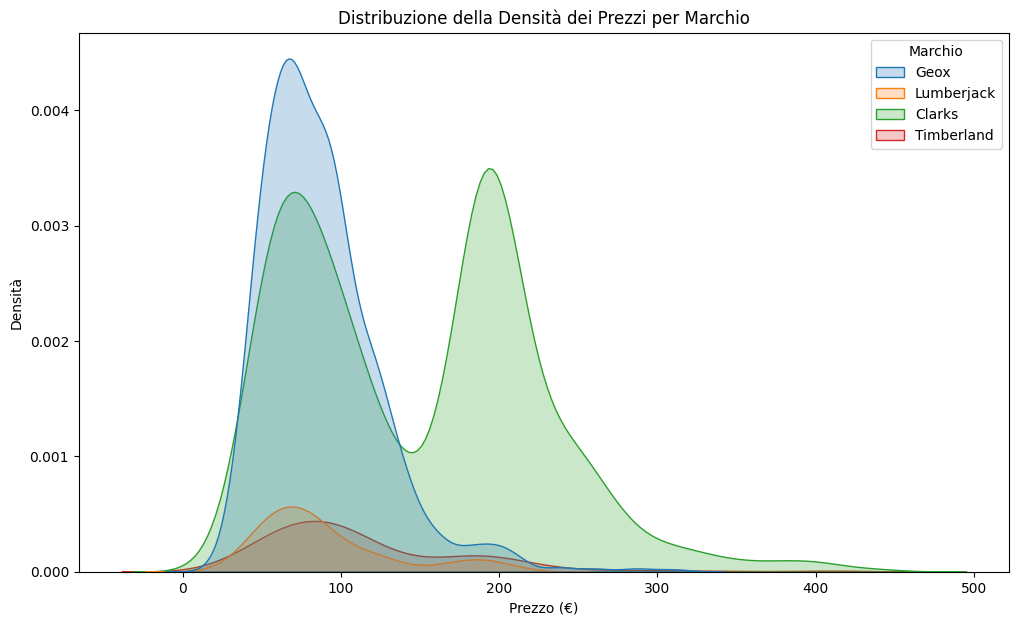

In [ ]:
## Grafico: Distribuzione Densità Prezzi per Marchio

plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_scarpe_no_null, x='Prezzo', hue='Marchio', fill=True)

plt.title('Distribuzione della Densità dei Prezzi per Marchio')
plt.xlabel('Prezzo (€)')
plt.ylabel('Densità')
plt.show()

<ipython-input-159-6d003d6f5e35>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')


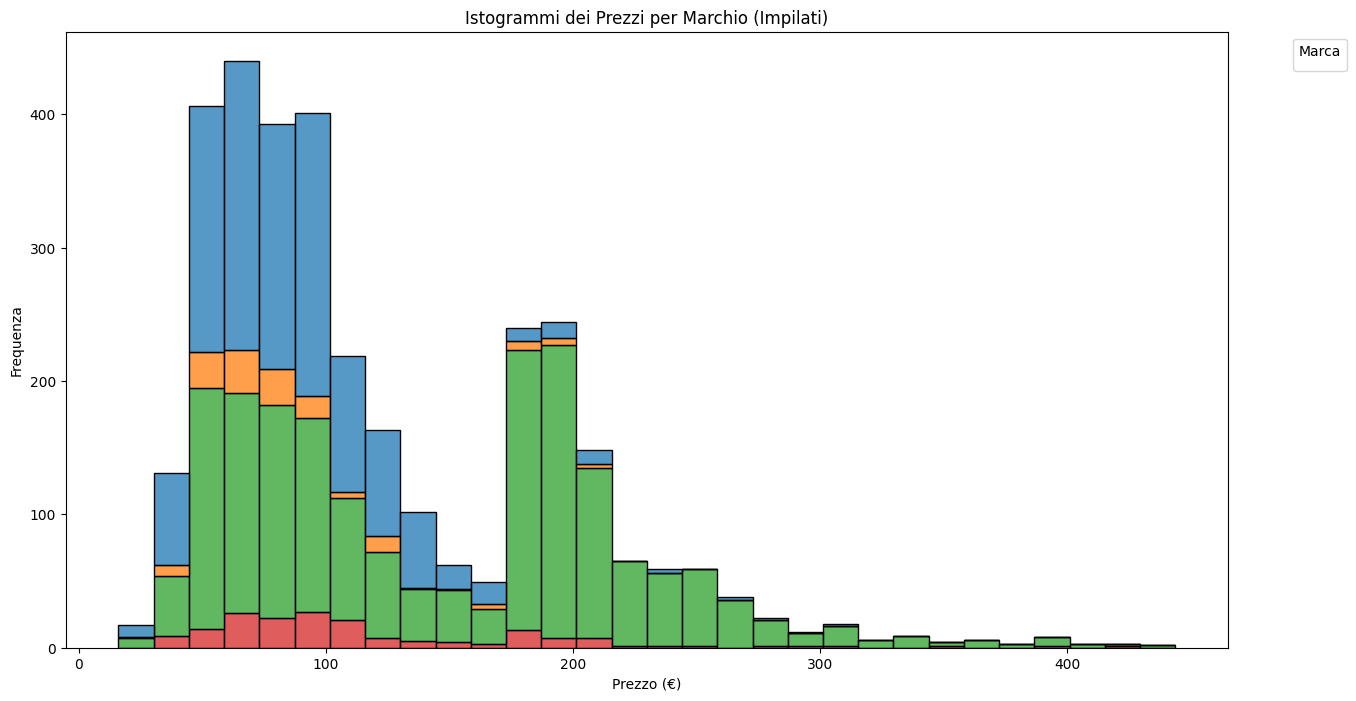

In [ ]:
## Grafico: Istogrammi dei Prezzi per Marchio

# Istogrammi affiancati (può diventare difficile da leggere con molti marchi)
# plt.figure(figsize=(15, 8))
# sns.histplot(data=df_scarpe_no_null, x='Prezzo', hue='Marchio', multiple='dodge', bins=30)
# plt.title('Istogrammi dei Prezzi per Marchio (Affiancati)')
# plt.xlabel('Prezzo (€)')
# plt.ylabel('Frequenza')
# plt.show()

# Istogrammi impilati (mostra la contribuzione di ciascun marchio a intervalli di prezzo)
plt.figure(figsize=(15, 8))
sns.histplot(data=df_scarpe_no_null, x='Prezzo', hue='Marchio', multiple='stack', bins=30)
plt.title('Istogrammi dei Prezzi per Marchio (Impilati)')
plt.xlabel('Prezzo (€)')
plt.ylabel('Frequenza')
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

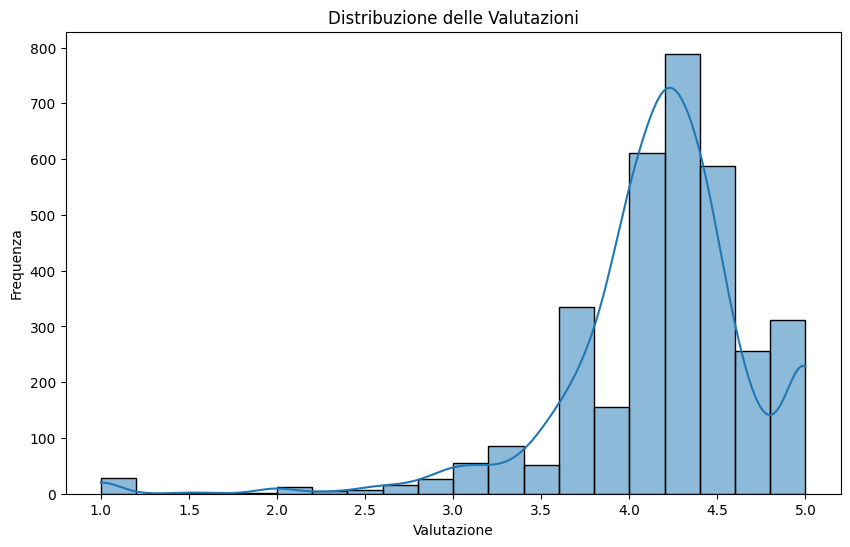

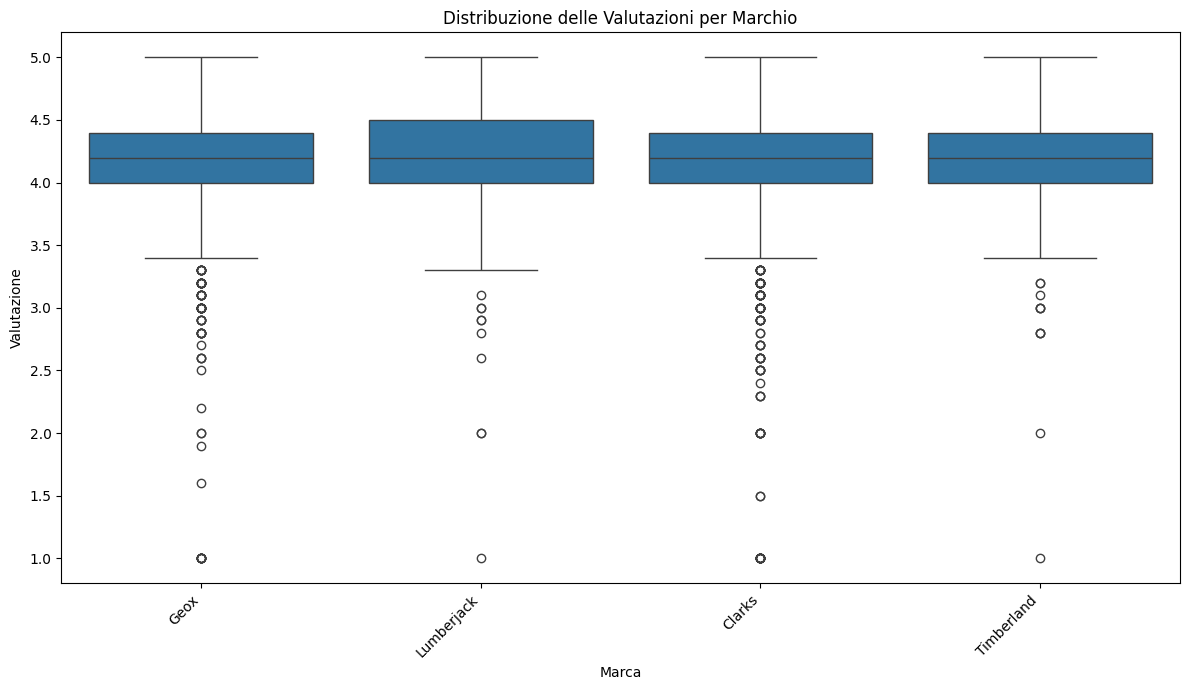

In [ ]:
## Analisi Quantitativa: Distribuzione della Valutazione

# Istogramma della distribuzione generale delle valutazioni
plt.figure(figsize=(10, 6))
sns.histplot(df_scarpe_no_null['Valutazione'], bins=20, kde=True) # Valutazioni tipicamente tra 1 e 5
plt.title('Distribuzione delle Valutazioni')
plt.xlabel('Valutazione')
plt.ylabel('Frequenza')
plt.show()

# Box plot della distribuzione delle valutazioni per Marchio
plt.figure(figsize=(12, 7))
sns.boxplot(x='Marchio', y='Valutazione', data=df_scarpe_no_null)
plt.title('Distribuzione delle Valutazioni per Marchio')
plt.xlabel('Marca')
plt.ylabel('Valutazione')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Analisi Quantitativa: Valutazione Media Generale

average_rating_overall = df_scarpe_no_null['Valutazione'].mean()
print(f"Valutazione media generale dei prodotti: {average_rating_overall:.2f}")

Valutazione media generale dei prodotti: 4.16


In [ ]:
## Analisi Quantitativa: Valutazione Media per Marchio

average_rating_by_brand = df_scarpe_no_null.groupby('Marchio')['Valutazione'].mean().sort_values(ascending=False)
print("\nValutazione media per Marchio:")
display(average_rating_by_brand)


Valutazione media per Marchio:


,Valutazione
Marchio,
Timberland,4.172989
Clarks,4.159176
Geox,4.150084
Lumberjack,4.148667


In [ ]:
## Analisi Quantitativa: Valutazione Media per Marchio e le 10 Categorie Principali (per Quantità)

# Group by Marchio and categoria_completa and count the number of products
category_brand_counts = df_scarpe_no_null.groupby(['Marchio', 'categoria_completa']).size().unstack(fill_value=0)

# Get the top 10 categories overall based on product count
top_categories_overall = category_brand_counts.sum().sort_values(ascending=False).head(10).index

# Filter the original DataFrame to include only products from the top 10 categories
df_top_categories = df_scarpe_no_null[df_scarpe_no_null['categoria_completa'].isin(top_categories_overall)]

# Now group the filtered DataFrame by Marchio and categoria_completa and calculate the mean rating
average_rating_top_categories = df_top_categories.groupby(['Marchio', 'categoria_completa'])['Valutazione'].mean().unstack()

print("\nValutazione media per Marchio nelle 10 Categorie Principali (per Quantità):")
display(average_rating_top_categories)


Valutazione media per Marchio nelle 10 Categorie Principali (per Quantità):


categoria_completa,Ballerine,Boots,Mary Jane,Mocassini,Oxford,Sandali,Scarpe da ginnastica,Sneakers,Stivali,Zeppe
Marchio,,,,,,,,,,
Clarks,4.182927,4.171698,4.175000,4.148048,4.301818,4.147385,4.121538,4.157407,4.131529,4.131250
Geox,4.092754,4.266667,3.834615,4.267308,4.400000,4.148908,4.126407,4.251351,4.175335,4.074074
Lumberjack,NaN,4.400000,NaN,4.260000,NaN,3.977778,4.052941,4.260000,4.002564,4.223077
Timberland,3.900000,4.237500,NaN,4.200000,4.112500,4.196667,3.666667,4.155556,4.182192,NaN


In [ ]:
# Calcoliamo la correlazione tra Prezzo e Valutazione sul DataFrame filtrato (senza nulli)
correlation_price_rating = df_scarpe_no_null['Prezzo'].corr(df_scarpe_no_null['Valutazione'])

print(f"Coefficiente di correlazione tra Prezzo e Valutazione (su tutti i prodotti): {correlation_price_rating:.2f}")

# Possiamo anche calcolare la correlazione sulle medie aggregate se interessati alla relazione tra
# prezzo medio e valutazione media a livello di gruppo (es. per combinazione Marchio/Categoria/Colore)
# Assumendo che model_counts_filt esista (creato in precedenza):
if 'model_counts_filt' in locals():
    corr_agg = model_counts_filt['media_prezzo'].corr(model_counts_filt['media_valutazione'])
    print(f"Coefficiente di correlazione tra Prezzo Medio e Valutazione Media (su gruppi aggregati): {corr_agg:.2f}")

    # Possiamo anche vedere la matrice di correlazione per più variabili aggregate
    print("\nMatrice di correlazione sulle metriche aggregate:")
    display(model_counts_filt[['media_prezzo', 'media_valutazione', 'conteggio']].corr(numeric_only=True))

Coefficiente di correlazione tra Prezzo e Valutazione (su tutti i prodotti): -0.02
Coefficiente di correlazione tra Prezzo Medio e Valutazione Media (su gruppi aggregati): 0.05

Matrice di correlazione sulle metriche aggregate:


,media_prezzo,media_valutazione,conteggio
media_prezzo,1.000000,0.047139,-0.013066
media_valutazione,0.047139,1.000000,-0.099315
conteggio,-0.013066,-0.099315,1.000000


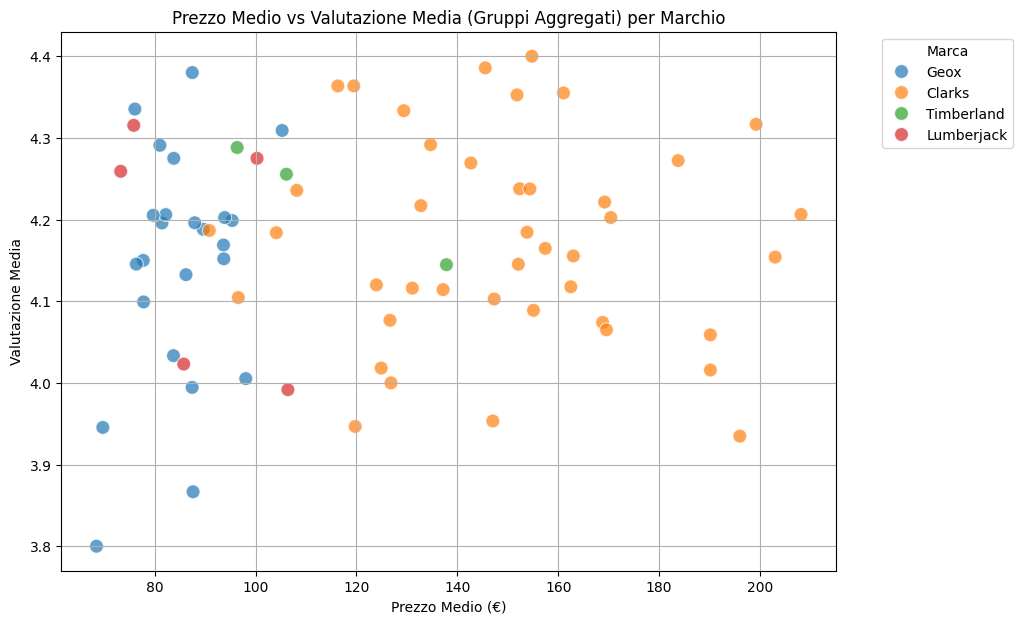

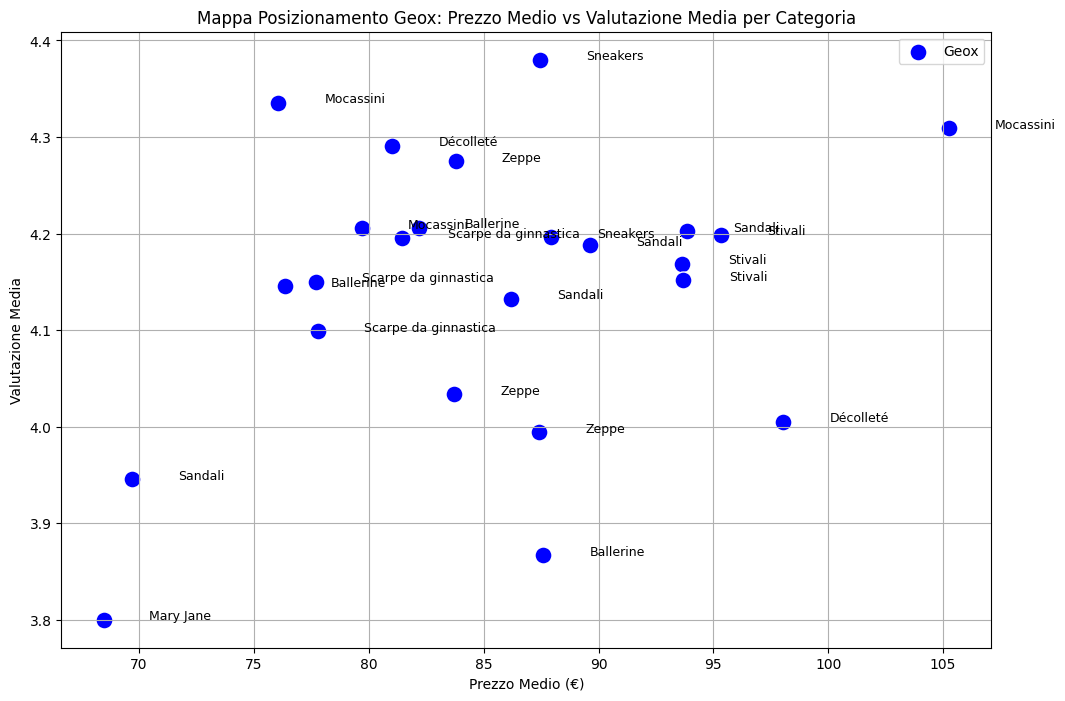

In [ ]:
## Grafico: Scatter Plot Prezzo Medio vs Valutazione Media (sui gruppi aggregati)

# Assumendo che model_counts_filt esista:
if 'model_counts_filt' in locals():
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=model_counts_filt, x='media_prezzo', y='media_valutazione', hue='Marchio', s=100, alpha=0.7) # s per dimensione punti

    plt.title('Prezzo Medio vs Valutazione Media (Gruppi Aggregati) per Marchio')
    plt.xlabel('Prezzo Medio (€)')
    plt.ylabel('Valutazione Media')
    plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Possiamo anche etichettare i punti con la categoria_completa per specifici marchi
    plt.figure(figsize=(12, 8))
    geox_aggregated = model_counts_filt[model_counts_filt['Marchio'] == 'Geox']
    sns.scatterplot(data=geox_aggregated, x='media_prezzo', y='media_valutazione', s=150, color='blue', label='Geox')
    for i in range(len(geox_aggregated)):
        plt.text(geox_aggregated['media_prezzo'].iloc[i] + 2, geox_aggregated['media_valutazione'].iloc[i],
                 geox_aggregated['categoria_completa'].iloc[i], fontsize=9)

    plt.title('Mappa Posizionamento Geox: Prezzo Medio vs Valutazione Media per Categoria')
    plt.xlabel('Prezzo Medio (€)')
    plt.ylabel('Valutazione Media')
    plt.grid(True)
    plt.legend()
    plt.show()


else:
    print("DataFrame 'model_counts_filt' non trovato. Eseguire il codice di aggregazione.")

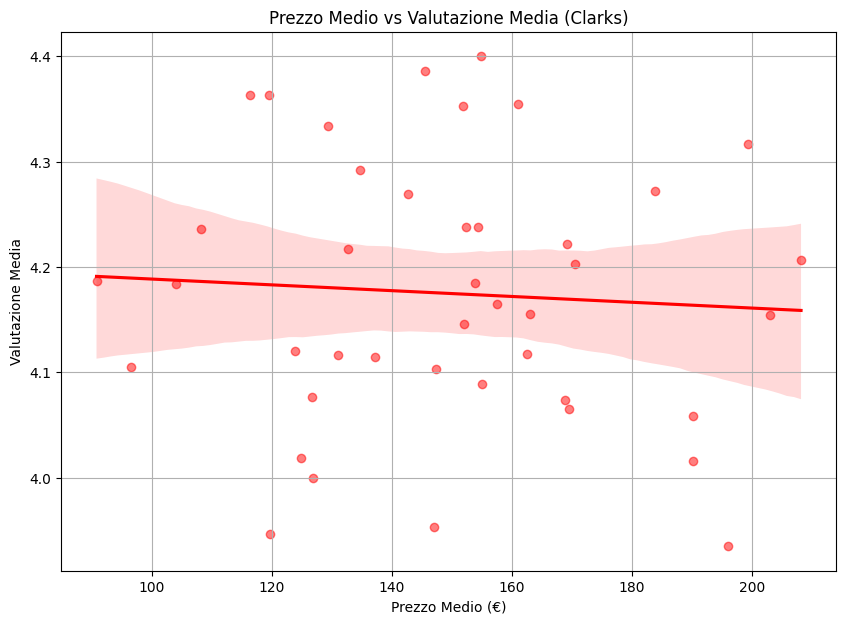

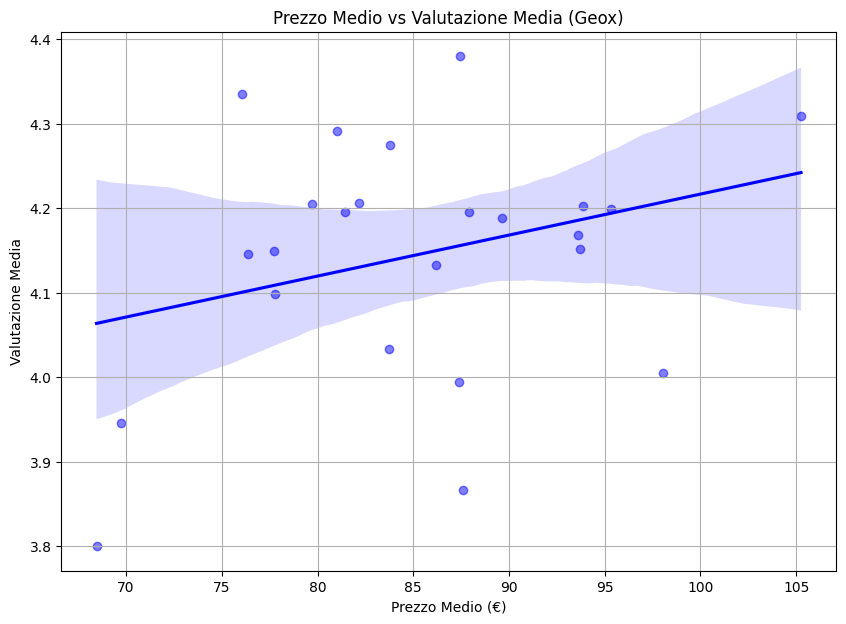

In [ ]:
## Grafico: Regression Plot Prezzo Medio vs Valutazione Media (Clarks)

# Assumendo che model_counts_filt esista:
if 'model_counts_filt' in locals():
    # Filtra il DataFrame per includere solo il marchio 'Clarks'
    df_clarks_aggregated = model_counts_filt[model_counts_filt['Marchio'] == 'Clarks']

    plt.figure(figsize=(10, 7))

    # Crea il regression plot per Clarks
    sns.regplot(data=df_clarks_aggregated,
                x='media_prezzo', y='media_valutazione',
                color='red', # Puoi scegliere un colore per Clarks
                scatter_kws={'alpha': 0.5}) # Rende i punti più trasparenti


    plt.title('Prezzo Medio vs Valutazione Media (Clarks)')
    plt.xlabel('Prezzo Medio (€)')
    plt.ylabel('Valutazione Media')
    plt.grid(True)
    plt.show()

    ## Grafico: Regression Plot Prezzo Medio vs Valutazione Media (Geox)

    # Filtra il DataFrame per includere solo il marchio 'Geox'
    df_geox_aggregated = model_counts_filt[model_counts_filt['Marchio'] == 'Geox']

    plt.figure(figsize=(10, 7))

    # Crea il regression plot per Geox
    sns.regplot(data=df_geox_aggregated,
                x='media_prezzo', y='media_valutazione',
                color='blue', # Puoi scegliere un colore per Geox
                scatter_kws={'alpha': 0.5}) # Rende i punti più trasparenti


    plt.title('Prezzo Medio vs Valutazione Media (Geox)')
    plt.xlabel('Prezzo Medio (€)')
    plt.ylabel('Valutazione Media')
    plt.grid(True)
    plt.show()

else:
    print("DataFrame 'model_counts_filt' non trovato. Eseguire il codice di aggregazione.")

In [ ]:
# Assumendo che model_counts_filt esista:
if 'model_counts_filt' in locals():
    # Filtra il DataFrame per includere solo il marchio 'Clarks'
    df_clarks_aggregated = model_counts_filt[model_counts_filt['Marchio'] == 'Clarks']
    # Filtra il DataFrame per includere solo il marchio 'Geox'
    df_geox_aggregated = model_counts_filt[model_counts_filt['Marchio'] == 'Geox']

    # Calcola la correlazione per Clarks
    if not df_clarks_aggregated.empty:
        corr_clarks = df_clarks_aggregated['media_prezzo'].corr(df_clarks_aggregated['media_valutazione'])
        print(f"Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Clarks: {corr_clarks:.2f}")
    else:
        print("Nessun dato aggregato trovato per Clarks.")

    # Calcola la correlazione per Geox
    if not df_geox_aggregated.empty:
        corr_geox = df_geox_aggregated['media_prezzo'].corr(df_geox_aggregated['media_valutazione'])
        print(f"Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Geox: {corr_geox:.2f}")
    else:
        print("Nessun dato aggregato trovato per Geox.")

else:
    print("DataFrame 'model_counts_filt' non trovato. Eseguire il codice di aggregazione.")

Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Clarks: -0.06
Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Geox: 0.30


In [ ]:
# Aggregare i dati per Marchio e Categoria Completa, calcolando il conteggio, il prezzo medio e la valutazione media
model_counts_by_category = (
    df_scarpe_no_null
    .groupby(["Marchio", "categoria_completa"])
    .agg(conteggio=('Marchio', 'size'),
         media_valutazione=('Valutazione', 'mean'),
         media_prezzo=('Prezzo', 'mean'))
    .reset_index()
)

# Visualizza le prime righe e informazioni per verifica
print("DataFrame aggregato per Marchio e Categoria:")
display(model_counts_by_category.head())
model_counts_by_category.info()

DataFrame aggregato per Marchio e Categoria:


,Marchio,categoria_completa,conteggio,media_valutazione,media_prezzo
0,Clarks,Anfibi,5,4.520000,83.770000
1,Clarks,Ballerine,82,4.182927,139.119756
2,Clarks,Boots,53,4.171698,139.281887
3,Clarks,Chukka boots,15,4.160000,152.106000
4,Clarks,Ciabatte,44,4.015909,188.705909


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Marchio             74 non-null     object 
 1   categoria_completa  74 non-null     object 
 2   conteggio           74 non-null     int64  
 3   media_valutazione   74 non-null     float64
 4   media_prezzo        74 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.0+ KB


In [ ]:
## Analisi Statistica: Correlazione Prezzo Medio vs Valutazione Media (Aggregata per Marchio e Categoria)

if not model_counts_by_category.empty:
    # Correlazione generale sulle medie aggregate (tutti i marchi/categorie)
    corr_agg_category = model_counts_by_category['media_prezzo'].corr(model_counts_by_category['media_valutazione'])
    print(f"Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media (aggregata per Marchio e Categoria): {corr_agg_category:.2f}")

    # Possiamo anche vedere la matrice di correlazione per più variabili aggregate
    print("\nMatrice di correlazione sulle metriche aggregate (Marchio/Categoria):")
    display(model_counts_by_category[['media_prezzo', 'media_valutazione', 'conteggio']].corr(numeric_only=True))

    # Calcola la correlazione separatamente per Clarks e Geox (sulle medie per categoria)
    df_clarks_cat_agg = model_counts_by_category[model_counts_by_category['Marchio'] == 'Clarks']
    df_geox_cat_agg = model_counts_by_category[model_counts_by_category['Marchio'] == 'Geox']

    if not df_clarks_cat_agg.empty:
        corr_clarks_cat_agg = df_clarks_cat_agg['media_prezzo'].corr(df_clarks_cat_agg['media_valutazione'])
        print(f"\nCoefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Clarks (aggregata per Categoria): {corr_clarks_cat_agg:.2f}")
    else:
         print("\nNessun dato aggregato per Categoria trovato per Clarks.")

    if not df_geox_cat_agg.empty:
        corr_geox_cat_agg = df_geox_cat_agg['media_prezzo'].corr(df_geox_cat_agg['media_valutazione'])
        print(f"Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Geox (aggregata per Categoria): {corr_geox_cat_agg:.2f}")
    else:
        print("Nessun dato aggregato per Categoria trovato per Geox.")


else:
    print("DataFrame 'model_counts_by_category' è vuoto.")

Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media (aggregata per Marchio e Categoria): 0.09

Matrice di correlazione sulle metriche aggregate (Marchio/Categoria):


,media_prezzo,media_valutazione,conteggio
media_prezzo,1.000000,0.086668,0.049573
media_valutazione,0.086668,1.000000,-0.047377
conteggio,0.049573,-0.047377,1.000000



Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Clarks (aggregata per Categoria): -0.51
Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Geox (aggregata per Categoria): -0.25


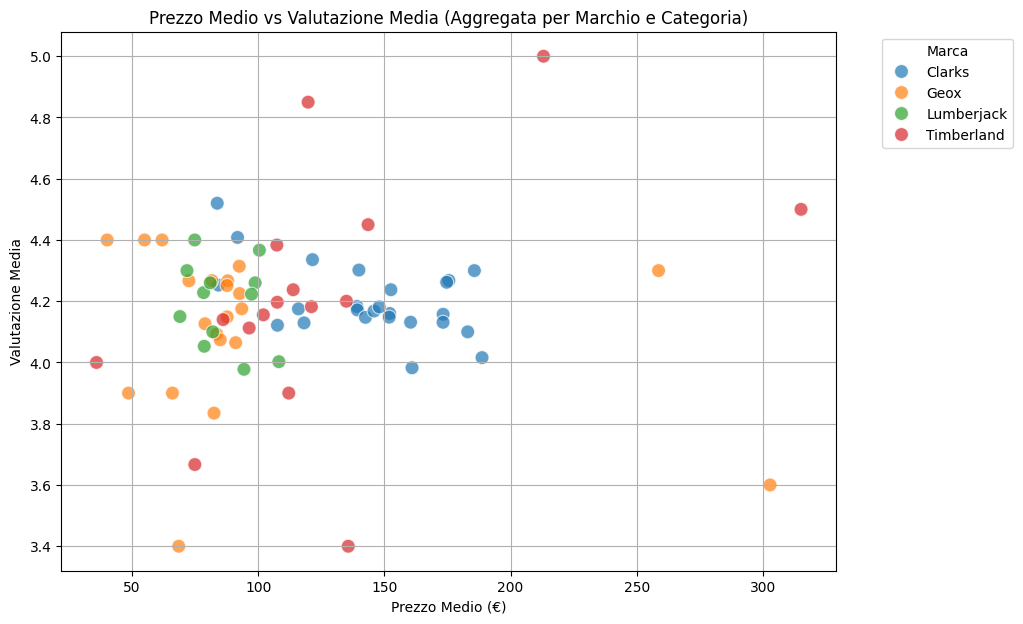

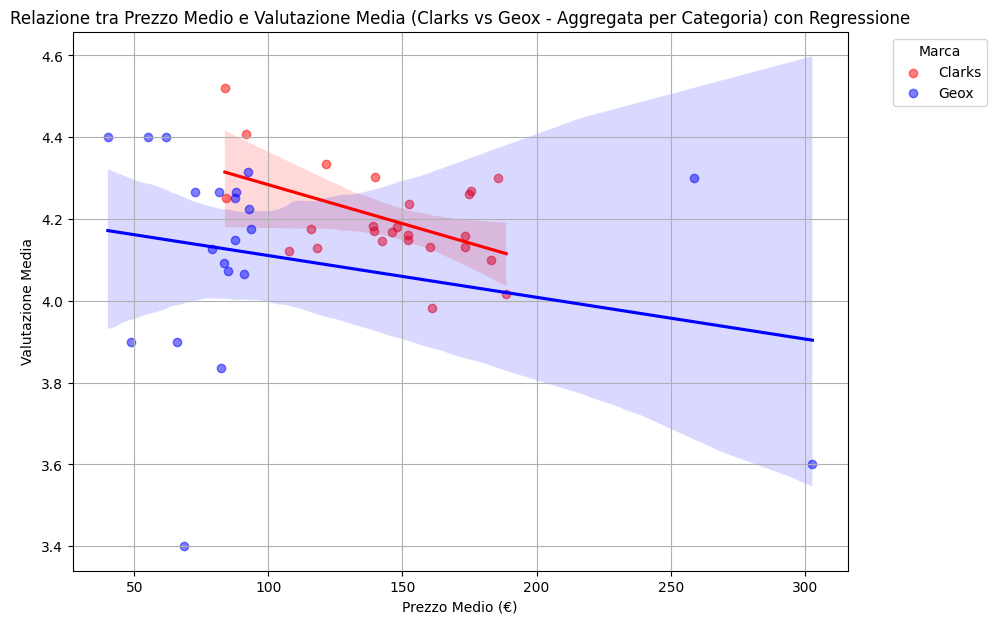

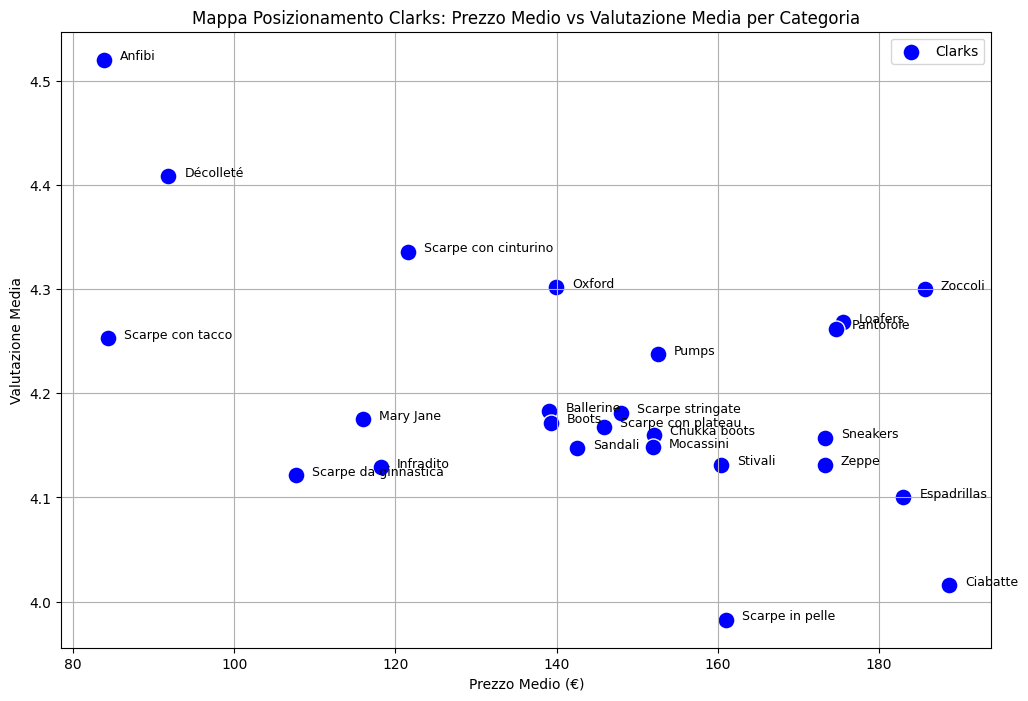

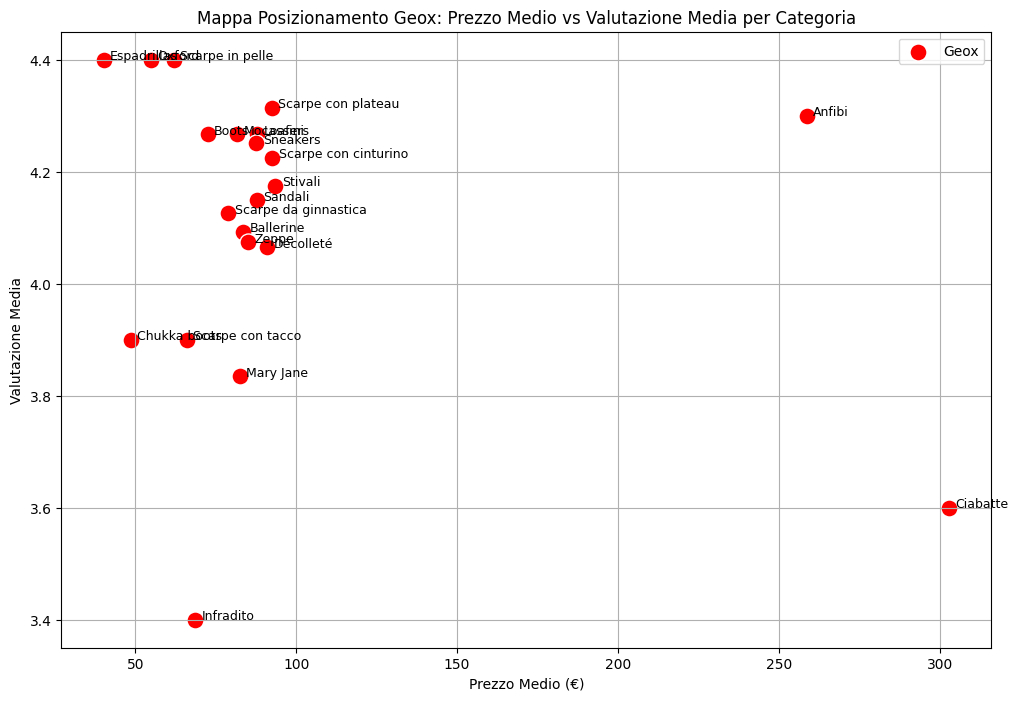

In [ ]:
## Grafico: Scatter Plot Prezzo Medio vs Valutazione Media (Aggregata per Marchio e Categoria)

if not model_counts_by_category.empty:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=model_counts_by_category, x='media_prezzo', y='media_valutazione', hue='Marchio', s=100, alpha=0.7) # s per dimensione punti

    plt.title('Prezzo Medio vs Valutazione Media (Aggregata per Marchio e Categoria)')
    plt.xlabel('Prezzo Medio (€)')
    plt.ylabel('Valutazione Media')
    plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    ## Grafico: Regression Plot Prezzo Medio vs Valutazione Media (Clarks vs Geox - Aggregata per Categoria)

    # Filtra il DataFrame aggregato per includere solo i marchi 'Clarks' e 'Geox'
    df_clarks_geox_cat_agg = model_counts_by_category[model_counts_by_category['Marchio'].isin(['Clarks', 'Geox'])]

    if not df_clarks_geox_cat_agg.empty:
        plt.figure(figsize=(10, 7))

        sns.regplot(data=df_clarks_geox_cat_agg[df_clarks_geox_cat_agg['Marchio'] == 'Clarks'],
                    x='media_prezzo', y='media_valutazione',
                    color='red',
                    label='Clarks',
                    scatter_kws={'alpha': 0.5})

        sns.regplot(data=df_clarks_geox_cat_agg[df_clarks_geox_cat_agg['Marchio'] == 'Geox'],
                    x='media_prezzo', y='media_valutazione',
                    color='blue',
                    label='Geox',
                    scatter_kws={'alpha': 0.5})

        plt.title('Relazione tra Prezzo Medio e Valutazione Media (Clarks vs Geox - Aggregata per Categoria) con Regressione')
        plt.xlabel('Prezzo Medio (€)')
        plt.ylabel('Valutazione Media')
        plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.show()
    else:
        print("DataFrame 'df_clarks_geox_cat_agg' è vuoto.")

    ## Grafici Separati con Etichette per Categoria (Aggregata per Categoria)

    # Grafico Clarks con etichette
    df_clarks_cat_agg = model_counts_by_category[model_counts_by_category['Marchio'] == 'Clarks']
    if not df_clarks_cat_agg.empty:
        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=df_clarks_cat_agg, x='media_prezzo', y='media_valutazione', s=150, color='blue', label='Clarks')
        for i in range(len(df_clarks_cat_agg)):
            plt.text(df_clarks_cat_agg['media_prezzo'].iloc[i] + 2, df_clarks_cat_agg['media_valutazione'].iloc[i],
                     df_clarks_cat_agg['categoria_completa'].iloc[i], fontsize=9)
        plt.title('Mappa Posizionamento Clarks: Prezzo Medio vs Valutazione Media per Categoria')
        plt.xlabel('Prezzo Medio (€)')
        plt.ylabel('Valutazione Media')
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        print("Nessun dato aggregato per Categoria trovato per Clarks.")

    # Grafico Geox con etichette
    df_geox_cat_agg = model_counts_by_category[model_counts_by_category['Marchio'] == 'Geox']
    if not df_geox_cat_agg.empty:
        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=df_geox_cat_agg, x='media_prezzo', y='media_valutazione', s=150, color='red', label='Geox')
        for i in range(len(df_geox_cat_agg)):
            plt.text(df_geox_cat_agg['media_prezzo'].iloc[i] + 2, df_geox_cat_agg['media_valutazione'].iloc[i],
                     df_geox_cat_agg['categoria_completa'].iloc[i], fontsize=9)
        plt.title('Mappa Posizionamento Geox: Prezzo Medio vs Valutazione Media per Categoria')
        plt.xlabel('Prezzo Medio (€)')
        plt.ylabel('Valutazione Media')
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        print("Nessun dato aggregato per Categoria trovato per Geox.")


else:
    print("DataFrame 'model_counts_by_category' non trovato. Eseguire il codice di aggregazione del punto 1.")

In [ ]:
# Assumiamo che model_counts_by_category esista (creato nel passaggio precedente)

if not model_counts_by_category.empty:
    # Calcolare il conteggio totale per ogni categoria aggregata (sommando su tutti i marchi)
    category_total_counts = model_counts_by_category.groupby('categoria_completa')['conteggio'].sum().sort_values(ascending=False)

    # Identificare le 10 categorie principali per numerosità
    top_10_categories_by_count = category_total_counts.head(10).index

    # Filtrare il DataFrame aggregato per includere solo le righe con le 10 categorie principali
    model_counts_top_categories = model_counts_by_category[model_counts_by_category['categoria_completa'].isin(top_10_categories_by_count)].copy()

    # Visualizza le prime righe e informazioni per verifica
    print("DataFrame aggregato filtrato per le 10 Categorie Principali:")
    display(model_counts_top_categories.head())
    model_counts_top_categories.info()

else:
    print("DataFrame 'model_counts_by_category' non trovato o vuoto. Eseguire il codice di aggregazione.")

DataFrame aggregato filtrato per le 10 Categorie Principali:


,Marchio,categoria_completa,conteggio,media_valutazione,media_prezzo
1,Clarks,Ballerine,82,4.182927,139.119756
2,Clarks,Boots,53,4.171698,139.281887
9,Clarks,Mary Jane,28,4.175000,115.951071
10,Clarks,Mocassini,333,4.148048,151.917447
11,Clarks,Oxford,55,4.301818,139.916182


<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1 to 72
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Marchio             35 non-null     object 
 1   categoria_completa  35 non-null     object 
 2   conteggio           35 non-null     int64  
 3   media_valutazione   35 non-null     float64
 4   media_prezzo        35 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
## Analisi Statistica: Correlazione Prezzo Medio vs Valutazione Media (Aggregata per Marchio/Categoria - 10 Categorie Principali)

if 'model_counts_top_categories' in locals() and not model_counts_top_categories.empty:
    # Correlazione generale sulle medie aggregate filtrate
    corr_agg_top_categories = model_counts_top_categories['media_prezzo'].corr(model_counts_top_categories['media_valutazione'])
    print(f"Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media (aggregata per Marchio/Categoria - 10 Categorie Principali): {corr_agg_top_categories:.2f}")

    # Matrice di correlazione
    print("\nMatrice di correlazione sulle metriche aggregate (Marchio/Categoria - 10 Categorie Principali):")
    display(model_counts_top_categories[['media_prezzo', 'media_valutazione', 'conteggio']].corr(numeric_only=True))

    # Calcola la correlazione separatamente per Clarks e Geox (sulle medie per categoria nelle 10 categorie principali)
    df_clarks_top_cat_agg = model_counts_top_categories[model_counts_top_categories['Marchio'] == 'Clarks']
    df_geox_top_cat_agg = model_counts_top_categories[model_counts_top_categories['Marchio'] == 'Geox']

    if not df_clarks_top_cat_agg.empty:
        corr_clarks_top_cat_agg = df_clarks_top_cat_agg['media_prezzo'].corr(df_clarks_top_cat_agg['media_valutazione'])
        print(f"\nCoefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Clarks (aggregata per Categoria - 10 Categorie Principali): {corr_clarks_top_cat_agg:.2f}")
    else:
         print("\nNessun dato aggregato per Categoria trovato per Clarks nelle 10 Categorie Principali.")

    if not df_geox_top_cat_agg.empty:
        corr_geox_top_cat_agg = df_geox_top_cat_agg['media_prezzo'].corr(df_geox_top_cat_agg['media_valutazione'])
        print(f"Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Geox (aggregata per Categoria - 10 Categorie Principali): {corr_geox_top_cat_agg:.2f}")
    else:
        print("Nessun dato aggregato per Categoria trovato per Geox nelle 10 Categorie Principali.")

else:
    print("DataFrame 'model_counts_top_categories' non trovato o vuoto. Eseguire il codice di filtro.")

Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media (aggregata per Marchio/Categoria - 10 Categorie Principali): 0.02

Matrice di correlazione sulle metriche aggregate (Marchio/Categoria - 10 Categorie Principali):


,media_prezzo,media_valutazione,conteggio
media_prezzo,1.000000,0.023775,0.329992
media_valutazione,0.023775,1.000000,0.018779
conteggio,0.329992,0.018779,1.000000



Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Clarks (aggregata per Categoria - 10 Categorie Principali): -0.12
Coefficiente di correlazione (r) tra Prezzo Medio e Valutazione Media per Geox (aggregata per Categoria - 10 Categorie Principali): -0.50


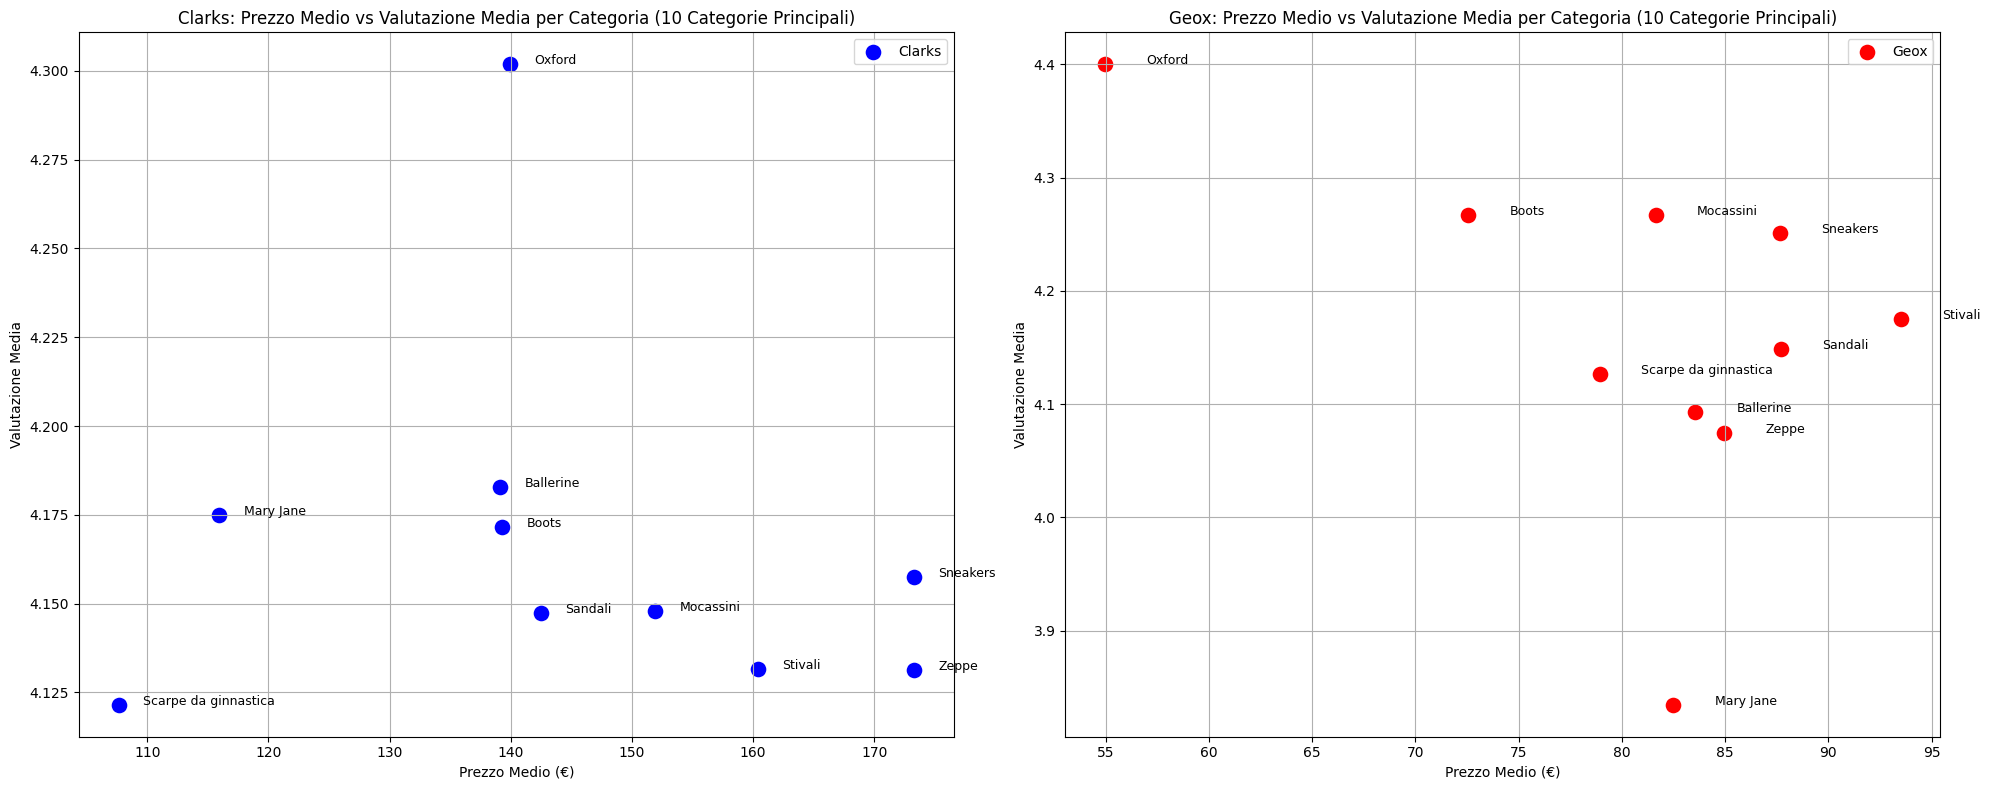

In [ ]:
## Grafici Affiancati con Etichette per Categoria (Aggregata per Categoria - 10 Categorie Principali)

# Assumiamo che model_counts_top_categories esista (filtrato per le 10 categorie principali)
if 'model_counts_top_categories' in locals() and not model_counts_top_categories.empty:
    # Filtra i DataFrame per includere solo i marchi 'Clarks' e 'Geox'
    df_clarks_top_cat_agg = model_counts_top_categories[model_counts_top_categories['Marchio'] == 'Clarks'].copy()
    df_geox_top_cat_agg = model_counts_top_categories[model_counts_top_categories['Marchio'] == 'Geox'].copy()

    # Controlla se entrambi i DataFrames non sono vuoti prima di tentare di plottare
    if not df_clarks_top_cat_agg.empty or not df_geox_top_cat_agg.empty:

        plt.figure(figsize=(20, 8)) # Aumenta la larghezza per avere spazio per due grafici affiancati

        # Grafico Clarks (Primo subplot)
        plt.subplot(1, 2, 1) # 1 riga, 2 colonne, primo grafico
        sns.scatterplot(data=df_clarks_top_cat_agg, x='media_prezzo', y='media_valutazione', s=150, color='blue', label='Clarks')
        for i in range(len(df_clarks_top_cat_agg)):
             if df_clarks_top_cat_agg['categoria_completa'].iloc[i] in top_10_categories_by_count:
                 plt.text(df_clarks_top_cat_agg['media_prezzo'].iloc[i] + 2, df_clarks_top_cat_agg['media_valutazione'].iloc[i],
                          df_clarks_top_cat_agg['categoria_completa'].iloc[i], fontsize=9)
        plt.title('Clarks: Prezzo Medio vs Valutazione Media per Categoria (10 Categorie Principali)')
        plt.xlabel('Prezzo Medio (€)')
        plt.ylabel('Valutazione Media')
        plt.grid(True)
        plt.legend()


        # Grafico Geox (Secondo subplot)
        plt.subplot(1, 2, 2) # 1 riga, 2 colonne, secondo grafico
        sns.scatterplot(data=df_geox_top_cat_agg, x='media_prezzo', y='media_valutazione', s=150, color='red', label='Geox')
        for i in range(len(df_geox_top_cat_agg)):
            if df_geox_top_cat_agg['categoria_completa'].iloc[i] in top_10_categories_by_count:
                plt.text(df_geox_top_cat_agg['media_prezzo'].iloc[i] + 2, df_geox_top_cat_agg['media_valutazione'].iloc[i],
                         df_geox_top_cat_agg['categoria_completa'].iloc[i], fontsize=9)
        plt.title('Geox: Prezzo Medio vs Valutazione Media per Categoria (10 Categorie Principali)')
        plt.xlabel('Prezzo Medio (€)')
        plt.ylabel('Valutazione Media')
        plt.grid(True)
        plt.legend()

        plt.tight_layout() # Aggiusta automaticamente i subplot per evitare sovrapposizioni
        plt.show()
    else:
        print("Nessun dato aggregato sufficiente per creare i grafici per Clarks o Geox nelle 10 Categorie Principali.")

else:
    print("DataFrame 'model_counts_top_categories' non trovato o vuoto. Eseguire il codice di filtro.")

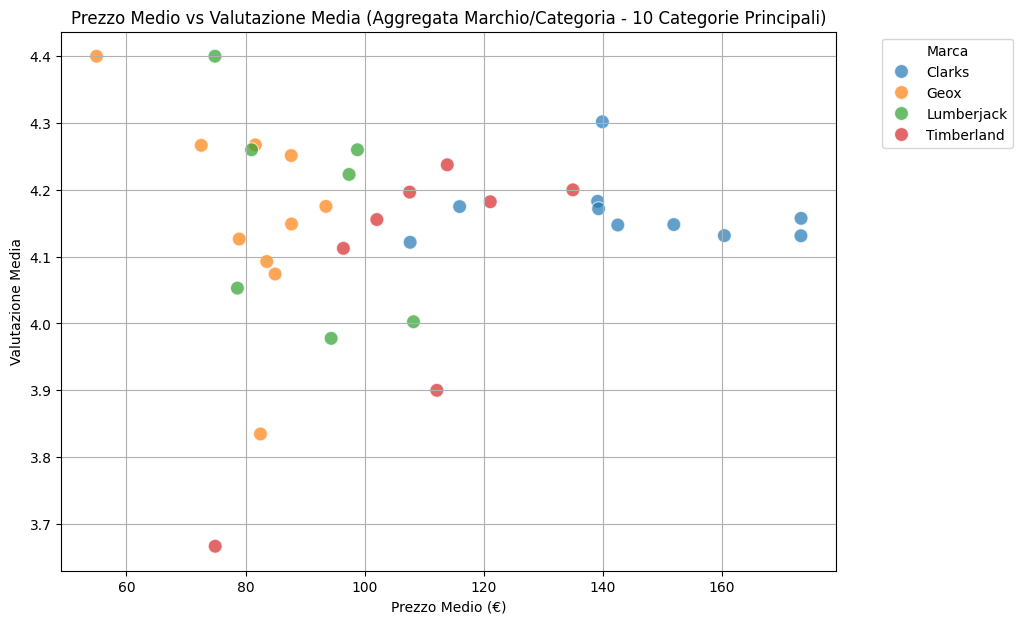

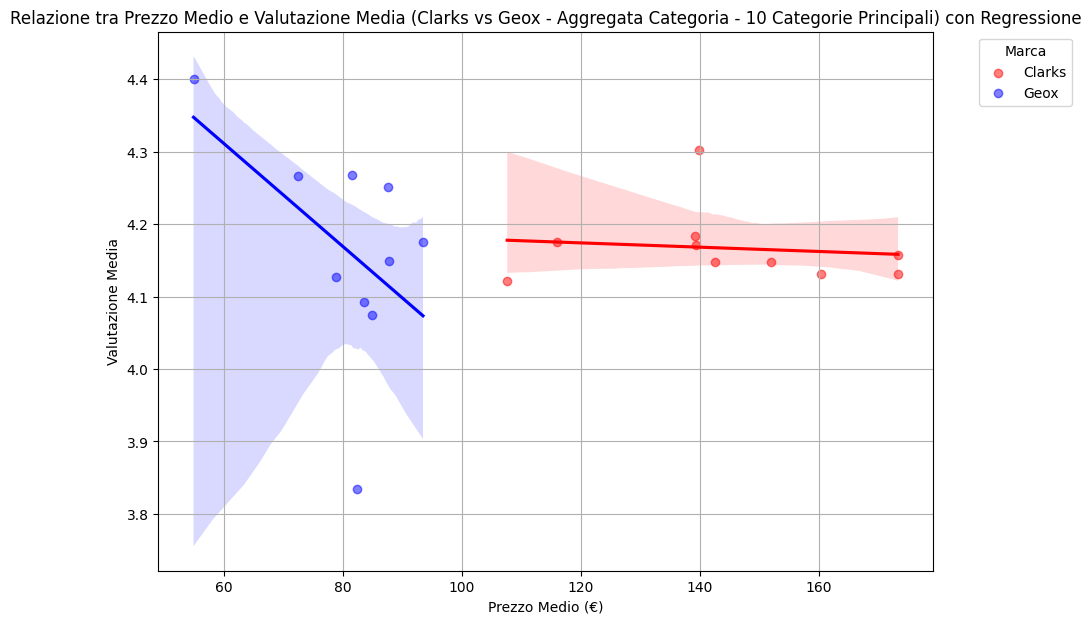

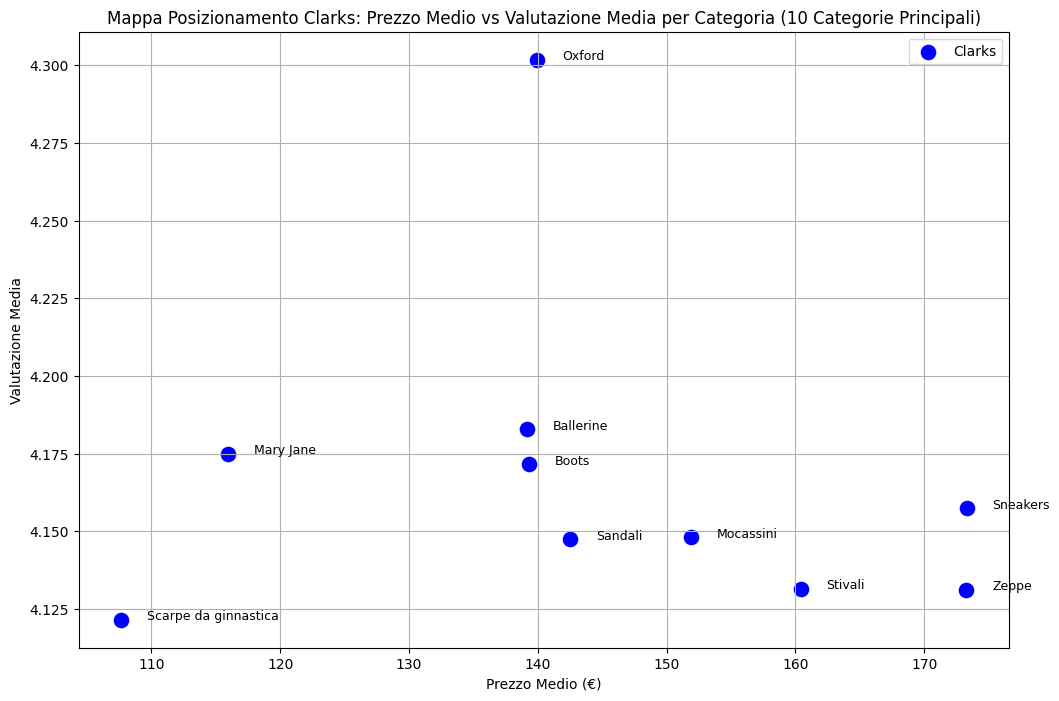

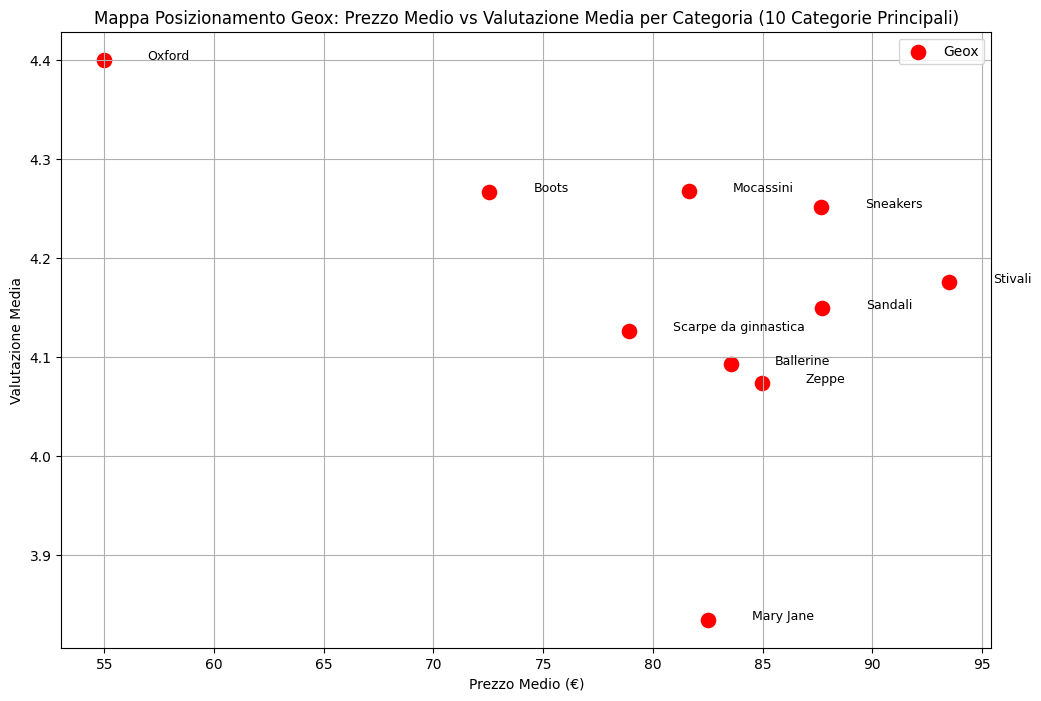

In [ ]:
## Grafico: Scatter Plot Prezzo Medio vs Valutazione Media (Aggregata Marchio/Categoria - 10 Categorie Principali)

if 'model_counts_top_categories' in locals() and not model_counts_top_categories.empty:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=model_counts_top_categories, x='media_prezzo', y='media_valutazione', hue='Marchio', s=100, alpha=0.7)

    plt.title('Prezzo Medio vs Valutazione Media (Aggregata Marchio/Categoria - 10 Categorie Principali)')
    plt.xlabel('Prezzo Medio (€)')
    plt.ylabel('Valutazione Media')
    plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    ## Grafico: Regression Plot Prezzo Medio vs Valutazione Media (Clarks vs Geox - Aggregata Categoria - 10 Categorie Principali)

    # Filtra il DataFrame aggregato per includere solo i marchi 'Clarks' e 'Geox' nelle 10 categorie principali
    df_clarks_geox_top_cat_agg = model_counts_top_categories[model_counts_top_categories['Marchio'].isin(['Clarks', 'Geox'])]

    if not df_clarks_geox_top_cat_agg.empty:
        plt.figure(figsize=(10, 7))

        sns.regplot(data=df_clarks_geox_top_cat_agg[df_clarks_geox_top_cat_agg['Marchio'] == 'Clarks'],
                    x='media_prezzo', y='media_valutazione',
                    color='red',
                    label='Clarks',
                    scatter_kws={'alpha': 0.5})

        sns.regplot(data=df_clarks_geox_top_cat_agg[df_clarks_geox_top_cat_agg['Marchio'] == 'Geox'],
                    x='media_prezzo', y='media_valutazione',
                    color='blue',
                    label='Geox',
                    scatter_kws={'alpha': 0.5})

        plt.title('Relazione tra Prezzo Medio e Valutazione Media (Clarks vs Geox - Aggregata Categoria - 10 Categorie Principali) con Regressione')
        plt.xlabel('Prezzo Medio (€)')
        plt.ylabel('Valutazione Media')
        plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.show()
    else:
        print("DataFrame 'df_clarks_geox_top_cat_agg' è vuoto.")

    ## Grafici Separati con Etichette per Categoria (Aggregata per Categoria - 10 Categorie Principali)

    # Grafico Clarks con etichette (solo le 10 categorie principali)
    df_clarks_top_cat_agg = model_counts_top_categories[model_counts_top_categories['Marchio'] == 'Clarks']
    if not df_clarks_top_cat_agg.empty:
        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=df_clarks_top_cat_agg, x='media_prezzo', y='media_valutazione', s=150, color='blue', label='Clarks')
        for i in range(len(df_clarks_top_cat_agg)):
             # Controlla se la categoria è nelle 10 principali prima di etichettare (già filtrato, ma per sicurezza)
             if df_clarks_top_cat_agg['categoria_completa'].iloc[i] in top_10_categories_by_count:
                 plt.text(df_clarks_top_cat_agg['media_prezzo'].iloc[i] + 2, df_clarks_top_cat_agg['media_valutazione'].iloc[i],
                          df_clarks_top_cat_agg['categoria_completa'].iloc[i], fontsize=9)
        plt.title('Mappa Posizionamento Clarks: Prezzo Medio vs Valutazione Media per Categoria (10 Categorie Principali)')
        plt.xlabel('Prezzo Medio (€)')
        plt.ylabel('Valutazione Media')
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        print("Nessun dato aggregato per Categoria trovato per Clarks nelle 10 Categorie Principali.")


    # Grafico Geox con etichette (solo le 10 categorie principali)
    df_geox_top_cat_agg = model_counts_top_categories[model_counts_top_categories['Marchio'] == 'Geox']
    if not df_geox_top_cat_agg.empty:
        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=df_geox_top_cat_agg, x='media_prezzo', y='media_valutazione', s=150, color='red', label='Geox')
        for i in range(len(df_geox_top_cat_agg)):
            # Controlla se la categoria è nelle 10 principali prima di etichettare (già filtrato, ma per sicurezza)
            if df_geox_top_cat_agg['categoria_completa'].iloc[i] in top_10_categories_by_count:
                plt.text(df_geox_top_cat_agg['media_prezzo'].iloc[i] + 2, df_geox_top_cat_agg['media_valutazione'].iloc[i],
                         df_geox_top_cat_agg['categoria_completa'].iloc[i], fontsize=9)
        plt.title('Mappa Posizionamento Geox: Prezzo Medio vs Valutazione Media per Categoria (10 Categorie Principali)')
        plt.xlabel('Prezzo Medio (€)')
        plt.ylabel('Valutazione Media')
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        print("Nessun dato aggregato per Categoria trovato per Geox nelle 10 Categorie Principali.")


else:
    print("DataFrame 'model_counts_top_categories' non trovato o vuoto. Eseguire il codice di filtro.")

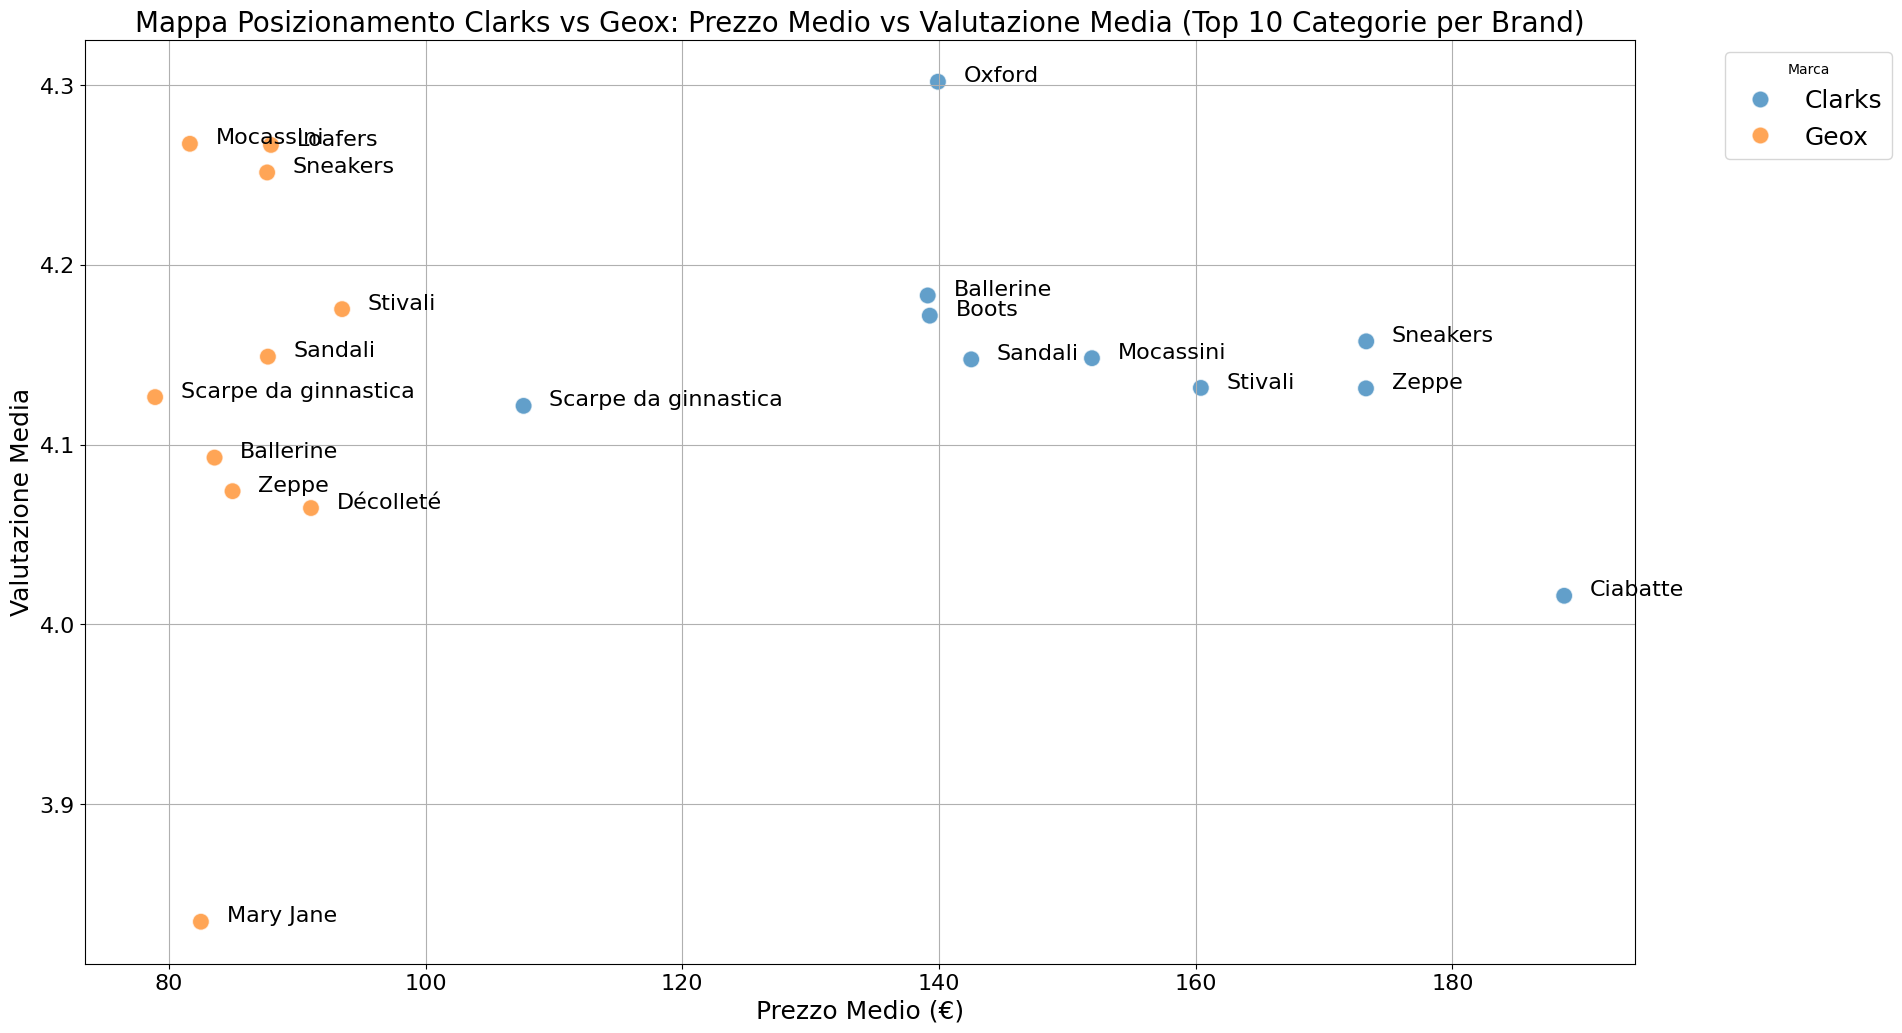

In [ ]:
## Grafico: Mappa Posizionamento Clarks vs Geox con Etichette Categoria (Aggregata per Categoria - Top 10 per Marca)

# Assumiamo che model_counts_by_category esista (creato nel passaggio precedente)

if not model_counts_by_category.empty:
    # Filtra il DataFrame aggregato per i marchi Clarks e Geox
    df_clarks_cat_agg = model_counts_by_category[model_counts_by_category['Marchio'] == 'Clarks'].copy()
    df_geox_cat_agg = model_counts_by_category[model_counts_by_category['Marchio'] == 'Geox'].copy()

    # Controlla se ci sono dati per entrambi i marchi prima di procedere
    if not df_clarks_cat_agg.empty or not df_geox_cat_agg.empty:

        # Ordina per conteggio e prendi le prime 10 categorie per ciascun marchio
        df_clarks_top_10_cat = df_clarks_cat_agg.sort_values(by='conteggio', ascending=False).head(10)
        df_geox_top_10_cat = df_geox_cat_agg.sort_values(by='conteggio', ascending=False).head(10)

        # Combina i DataFrame delle top 10 categorie per il plot
        df_clarks_geox_top_10_combined = pd.concat([df_clarks_top_10_cat, df_geox_top_10_cat])

        if not df_clarks_geox_top_10_combined.empty:

            plt.figure(figsize=(20, 12))

            # Crea lo scatter plot
            sns.scatterplot(data=df_clarks_geox_top_10_combined,
                            x='media_prezzo', y='media_valutazione',
                            hue='Marchio', # Colora i punti in base al marchio
                            s=150, # Dimensione dei punti
                            alpha=0.7) # Trasparenza dei punti

            # Aggiungi le etichette per ogni punto
            for index, row in df_clarks_geox_top_10_combined.iterrows():
                plt.text(row['media_prezzo'] + 2, row['media_valutazione'],
                         row['categoria_completa'], fontsize=16) # Sposta leggermente l'etichetta

            plt.title('Mappa Posizionamento Clarks vs Geox: Prezzo Medio vs Valutazione Media (Top 10 Categorie per Brand)', fontsize=20)
            plt.xlabel('Prezzo Medio (€)', fontsize=18)
            plt.ylabel('Valutazione Media', fontsize=18)
            plt.legend(title='Marca', fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            plt.grid(True)
            plt.show()
        else:
            print("DataFrame combinato delle top 10 categorie per Clarks e Geox è vuoto.")

    else:
        print("Nessun dato aggregato trovato per Clarks o Geox.")

else:
    print("DataFrame 'model_counts_by_category' non trovato o vuoto. Eseguire il codice di aggregazione.")

In [ ]:
# Assumiamo che model_counts_by_category esista (creato nel passaggio precedente)

if not model_counts_by_category.empty:
    # Creare un dizionario per memorizzare le 10 categorie principali per ciascun marchio
    top_10_categories_per_brand = {}

    # Iterare sui marchi unici
    for brand in model_counts_by_category['Marchio'].unique():
        # Filtrare il DataFrame per il marchio corrente
        df_brand = model_counts_by_category[model_counts_by_category['Marchio'] == brand]

        # Ordinare le categorie per conteggio e prendere le prime 10
        top_categories = df_brand.sort_values(by='conteggio', ascending=False).head(10)['categoria_completa'].tolist()

        # Memorizzare nel dizionario
        top_10_categories_per_brand[brand] = top_categories

    # Visualizza le prime categorie principali per ogni marchio
    print("10 Categorie Principali per ciascun Marchio:")
    for brand, categories in top_10_categories_per_brand.items():
        print(f"{brand}: {categories}")

else:
    print("DataFrame 'model_counts_by_category' non trovato o vuoto. Eseguire il codice di aggregazione.")

10 Categorie Principali per ciascun Marchio:
Clarks: ['Mocassini', 'Sandali', 'Stivali', 'Scarpe da ginnastica', 'Zeppe', 'Ballerine', 'Oxford', 'Sneakers', 'Boots', 'Ciabatte']
Geox: ['Stivali', 'Scarpe da ginnastica', 'Sandali', 'Sneakers', 'Ballerine', 'Zeppe', 'Mocassini', 'Décolleté', 'Mary Jane', 'Loafers']
Lumberjack: ['Stivali', 'Scarpe stringate', 'Sneakers', 'Scarpe da ginnastica', 'Zeppe', 'Sandali', 'Boots', 'Mocassini', 'Anfibi', 'Ciabatte']
Timberland: ['Stivali', 'Sandali', 'Boots', 'Sneakers', 'Oxford', 'Mocassini', 'Scarpe da ginnastica', 'Scarpe in pelle', 'Ballerine', 'Ciabatte']


In [ ]:

#EDA - Analisi delle colonne categoriche

'''con un ciclo for creo una panoramica sui valori unici, sul conteggio di valori per categoria,
 conteggio di valori nulli e relativa percentuale, modalità presenti'''

colonne_categoriche = model_counts_filt.columns
for col in colonne_categoriche:
  if model_counts_filt[col].dtype == 'object':
    print(f"\nColonna: '{col}'")
    print(f"Valori unici: {model_counts_filt[col].nunique()}")
    print(f"Valori:\n{model_counts_filt[col].value_counts()}")
    print(f"Valori nulli: {model_counts_filt[col].isnull().sum()} ({model_counts_filt[col].isnull().mean() * 100:.2f}%)")
    print(f"Modalità presenti: {model_counts_filt[col].unique()}")



Colonna: 'Marchio'
Valori unici: 4
Valori:
Marchio
Clarks        42
Geox          24
Lumberjack     5
Timberland     3
Name: count, dtype: int64
Valori nulli: 0 (0.00%)
Modalità presenti: ['Geox' 'Clarks' 'Timberland' 'Lumberjack']

Colonna: 'categoria_completa'
Valori unici: 21
Valori:
categoria_completa
Stivali                 10
Sandali                  9
Scarpe da ginnastica     8
Mocassini                7
Zeppe                    7
Sneakers                 5
Ballerine                5
Oxford                   3
Boots                    3
Décolleté                2
Loafers                  2
Infradito                2
Pantofole                2
Mary Jane                2
Pumps                    1
Ciabatte                 1
Scarpe stringate         1
Scarpe in pelle          1
Scarpe con tacco         1
Scarpe con cinturino     1
Chukka boots             1
Name: count, dtype: int64
Valori nulli: 0 (0.00%)
Modalità presenti: ['Stivali' 'Mocassini' 'Sandali' 'Scarpe da ginnastica' 

In [ ]:

model_counts_filt.describe()


,conteggio,media_valutazione,media_prezzo
count,74.000000,74.000000,74.000000
mean,39.175676,4.167192,122.944280
std,43.086520,0.130578,38.417295
min,10.000000,3.800000,68.454167
25%,14.250000,4.091449,87.679615
50%,20.000000,4.184158,119.608377
75%,41.000000,4.266696,153.450237
max,231.000000,4.400000,208.151250
